<a href="https://colab.research.google.com/github/UroojBaksh/Black-Friday-Sale_Analysis/blob/main/Black_Friday_Sales_analyisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from itertools import combinations
import warnings
import os
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

# Visualization configuration
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully")
print(f"Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Mounted at /content/drive
✓ All libraries imported successfully
Analysis started at: 2025-10-06 19:15:55


In [21]:
file_path = '/content/drive/My Drive/walmart_dat.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')


In [ ]:
df = pd.read_excel(file_path)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [8]:
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

   Shape: 550,068 rows × 10 columns


In [9]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [10]:
print(f"\n📊 Dataset Overview:")
print(f"   Total Transactions: {len(df):,}")

def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nUnique Values of {column}: ", unique_values)

# Example usage
print_unique_values(df)


def print_nunique_values(df):
    for column in df.columns:
        unique_values = df[column].nunique()
        print(f"\nUnique Values of {column}: ", unique_values)

# Example usage
print_nunique_values(df)

print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Step 2: Data Quality Assessment
print(f"\n🔍 Data Quality Assessment:")

# Check missing values
missing = df.isnull().sum()
if missing.sum() == 0:
    print(" No Missing Values: Dataset is complete")
else:
    print("  Missing Values Detected:")
    print(missing[missing > 0])


# Key observation
transactions_per_user = len(df) / df['User_ID'].nunique()
print(f"\n💡 Key Observation:")
print(f"  Average transactions per user: {transactions_per_user:.1f}")
print(f"  → This is transactional data where one user can have multiple purchases")

# Basic statistics
print(f"\n📈 Purchase Amount Statistics:")
print(df['Purchase'].describe().to_string())


📊 Dataset Overview:
   Total Transactions: 550,068

Unique Values of User_ID:  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique Values of Product_ID:  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique Values of Gender:  ['F' 'M']

Unique Values of Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique Values of Occupation:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique Values of City_Category:  ['A' 'C' 'B']

Unique Values of Stay_In_Current_City_Years:  [2 '4+' 3 1 0]

Unique Values of Marital_Status:  [0 1]

Unique Values of Product_Category:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique Values of Purchase:  [ 8370 15200  1422 ...   135   123   613]

Unique Values of User_ID:  5891

Unique Values of Product_ID:  3631

Unique Values of Gender:  2

Unique Values of Age:  7

Unique Values of Occupation:  21

Unique Values of City_Category:  3

Unique Values of Stay_In_Cur

In [22]:
df.Stay_In_Current_City_Years.unique()

array([2, '4+', 3, 1, 0], dtype=object)

In [19]:
if df['Stay_In_Current_City_Years'].str.contains('+', regex=False).any():
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace("+", "", regex=False)

In [23]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [24]:
df.Stay_In_Current_City_Years.unique()

array([2, '4', 3, 1, 0], dtype=object)

In [25]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'])

In [26]:
df.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

In [27]:
df.select_dtypes(include=['int64']).skew()

,0
User_ID,0.003066
Occupation,0.400140
Stay_In_Current_City_Years,0.317236
Marital_Status,0.367437
Product_Category,1.025735
Purchase,0.600140


In [28]:
# Checking duplicate values in the data set
df.duplicated(subset=None,keep='first').sum() # No duplicate values in the data set

np.int64(0)

In [29]:
print("DEMOGRAPHIC ANALYSIS")
print("="*60)

results = {}

# Gender Analysis
gender_stats = df.groupby('Gender').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'User_ID': 'nunique'
}).round(2)
gender_stats.columns = ['Transactions', 'Total_Revenue', 'Avg_Purchase', 'Unique_Users']
gender_stats['Revenue_Percent'] = (gender_stats['Total_Revenue'] /
                                    gender_stats['Total_Revenue'].sum() * 100).round(2)

print("\nGender Analysis:")
print(gender_stats)
results['gender'] = gender_stats

# Age Analysis
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_stats = df.groupby('Age').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'User_ID': 'nunique'
}).round(2)
age_stats.columns = ['Transactions', 'Total_Revenue', 'Avg_Purchase', 'Unique_Users']
age_stats = age_stats.reindex(age_order)

print("\nAge Group Analysis:")
print(age_stats)
results['age'] = age_stats

# City Category Analysis
city_stats = df.groupby('City_Category').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'User_ID': 'nunique',
    'Product_ID': 'nunique'
}).round(2)
city_stats.columns = ['Transactions', 'Total_Revenue', 'Avg_Purchase',
                      'Unique_Users', 'Unique_Products']

print("\nCity Category Analysis:")
print(city_stats)
results['city'] = city_stats

# Marital Status Analysis
marital_stats = df.groupby('Marital_Status').agg({
    'Purchase': ['count', 'sum', 'mean']
}).round(2)
marital_stats.columns = ['Transactions', 'Total_Revenue', 'Avg_Purchase']
marital_stats.index = ['Single', 'Married']

print("\nMarital Status Analysis:")
print(marital_stats)
results['marital'] = marital_stats


DEMOGRAPHIC ANALYSIS

Gender Analysis:
        Transactions  Total_Revenue  Avg_Purchase  Unique_Users  \
Gender                                                            
F             135809     1186232642       8734.57          1666   
M             414259     3909580100       9437.53          4225   

        Revenue_Percent  
Gender                   
F                 23.28  
M                 76.72  

Age Group Analysis:
       Transactions  Total_Revenue  Avg_Purchase  Unique_Users
Age                                                           
0-17          15102      134913183       8933.46           218
18-25         99660      913848675       9169.66          1069
26-35        219587     2031770578       9252.69          2053
36-45        110013     1026569884       9331.35          1167
46-50         45701      420843403       9208.63           531
51-55         38501      367099644       9534.81           481
55+           21504      200767375       9336.28           372


In [32]:
 print("\n" + "="*60)
print("STORE ALLOCATION ANALYSIS")
print("="*60)

store_metrics = []

for city in df['City_Category'].unique():
    city_data = df[df['City_Category'] == city]

    # Calculate metrics
    unique_customers = city_data['User_ID'].nunique()
    unique_products = city_data['Product_ID'].nunique()
    total_transactions = len(city_data)
    total_revenue = city_data['Purchase'].sum()
    avg_purchase = city_data['Purchase'].mean()
    trans_per_customer = total_transactions / unique_customers
    revenue_per_customer = total_revenue / unique_customers

    # Gender distribution
    male_pct = (city_data[city_data['Gender']=='M'].shape[0] / len(city_data)) * 100
    female_pct = (city_data[city_data['Gender']=='F'].shape[0] / len(city_data)) * 100
    # Dominant age group
    dominant_age = city_data['Age'].value_counts().index[0]

    # Top 3 categories
    top_categories = city_data['Product_Category'].value_counts().head(3)

    # Store Score (composite metric)
    store_score = (unique_customers * 0.4 +
                  unique_products * 0.3 +
                  trans_per_customer * 300)

    # Store format recommendation
    if store_score > 3000:
        format_rec = 'Large Format'
    elif store_score > 2000:
        format_rec = 'Medium Format'
    else:
        format_rec = 'Small Format'

    store_metrics.append({
        'City': city,
        'Total_Revenue': total_revenue,
        'Transactions': total_transactions,
        'Unique_Customers': unique_customers,
        'Unique_Products': unique_products,
        'Avg_Purchase': avg_purchase,
        'Trans_Per_Customer': trans_per_customer,
        'Revenue_Per_Customer': revenue_per_customer,
        'Male_Percent': male_pct,
        'Female_Percent': female_pct,
        'Dominant_Age': dominant_age,
        'Top_Category': top_categories.index[0],
        'Store_Score': store_score,
        'Format_Recommendation': format_rec
    })

store_df = pd.DataFrame(store_metrics)
store_df = store_df.sort_values('Total_Revenue', ascending=False)

print("\nStore Allocation Metrics:")
print(store_df.to_string(index=False))


STORE ALLOCATION ANALYSIS

Store Allocation Metrics:
City  Total_Revenue  Transactions  Unique_Customers  Unique_Products  Avg_Purchase  Trans_Per_Customer  Revenue_Per_Customer  Male_Percent  Female_Percent Dominant_Age  Top_Category  Store_Score Format_Recommendation
   B     2115533605        231173              1707             3452   9151.300563          135.426479          1.239328e+06     74.998810       25.001190        26-35             5 42346.343761          Large Format
   C     1663807476        171175              3139             3392   9719.920993           54.531698          5.300438e+05     75.283190       24.716810        26-35             1 18632.709398          Large Format
   A     1316471661        147720              1045             3477   8911.939216          141.358852          1.259781e+06     75.829949       24.170051        26-35             5 43868.755502          Large Format


In [33]:
#Calculate product affinity using market basket analysis
print("\n" + "="*60)
print("PRODUCT AFFINITY ANALYSIS")
print("="*60)

top_n=15

# Group by user to get their product categories
user_categories = df.groupby('User_ID')['Product_Category'].apply(list).reset_index()

# Calculate co-occurrence
co_occurrence = {}
total_users = len(user_categories)

# Count category occurrences per user
category_user_count = {}

for categories in user_categories['Product_Category']:
    unique_cats = list(set(categories))

    # Count single occurrences
    for cat in unique_cats:
        category_user_count[cat] = category_user_count.get(cat, 0) + 1

    # Count pairs
    for cat1, cat2 in combinations(unique_cats, 2):
        pair = tuple(sorted([cat1, cat2]))
        co_occurrence[pair] = co_occurrence.get(pair, 0) + 1

# Calculate lift scores
affinity_results = []

for (cat1, cat2), count in co_occurrence.items():
    # Calculate probabilities
    prob1 = category_user_count[cat1] / total_users
    prob2 = category_user_count[cat2] / total_users
    expected = prob1 * prob2 * total_users

    # Calculate lift
    lift = count / expected if expected > 0 else 0

    # Calculate confidence
    confidence = (count / category_user_count[cat1]) * 100

    affinity_results.append({
        'Category_1': cat1,
        'Category_2': cat2,
        'Co_Occurrences': count,
        'Lift': lift,
        'Confidence': confidence,
        'Strategy': 'Bundle' if lift > 1.5 else 'Cross-sell' if lift > 1.2 else 'Proximity'
    })

affinity_df = pd.DataFrame(affinity_results)
affinity_df = affinity_df.sort_values('Co_Occurrences', ascending=False).head(top_n)

print(f"\nTop {top_n} Product Affinity Pairs:")
print(affinity_df.to_string(index=False))


PRODUCT AFFINITY ANALYSIS

Top 15 Product Affinity Pairs:
 Category_1  Category_2  Co_Occurrences     Lift  Confidence  Strategy
          1           5            5632 1.000365   97.659095 Proximity
          1           8            5544 1.000743   96.133171 Proximity
          5           8            5540 1.002803   96.331073 Proximity
          1           2            4252 1.011039   73.729842 Proximity
          2           5            4234 1.009560   98.556797 Proximity
          2           8            4178 1.012403   97.253259 Proximity
          1           6            4040 1.010249   70.053754 Proximity
          6           8            4028 1.026471   98.604651 Proximity
          5           6            4027 1.009800   70.022605 Proximity
          3           5            3812 1.017404   99.322564 Proximity
          1           3            3784 1.007129   65.614704 Proximity
          3           8            3721 1.009262   96.951537 Proximity
          1       

In [34]:
print("\n" + "="*60)
print("INVENTORY OPTIMIZATION ANALYSIS")
print("="*60)

# Calculate metrics per category
category_metrics = []
total_revenue = df['Purchase'].sum()
estimated_days = 30  # Black Friday period estimate

for category in df['Product_Category'].unique():
    cat_data = df[df['Product_Category'] == category]

    revenue = cat_data['Purchase'].sum()
    transactions = len(cat_data)
    unique_products = cat_data['Product_ID'].nunique()
    avg_purchase = cat_data['Purchase'].mean()

    # Calculate velocity (transactions per day per product)
    velocity = transactions / (estimated_days * unique_products)

    # Revenue share
    revenue_share = (revenue / total_revenue) * 100

    # Priority score
    priority_score = (velocity * 0.4 +
                      (transactions / 1000) * 0.3 +
                      revenue_share * 0.3)

    # Stock level recommendation
    if priority_score > 15:
        stock_level = 'High'
    elif priority_score > 8:
        stock_level = 'Medium'
    else:
        stock_level = 'Low'

    category_metrics.append({
        'Category': category,
        'Revenue': revenue,
        'Transactions': transactions,
        'Unique_Products': unique_products,
        'Avg_Purchase': avg_purchase,
        'Velocity': velocity,
        'Revenue_Share': revenue_share,
        'Priority_Score': priority_score,
        'Stock_Level': stock_level
    })

inventory_df = pd.DataFrame(category_metrics)
inventory_df = inventory_df.sort_values('Priority_Score', ascending=False)

print("\nInventory Priority Analysis (Top 15):")
print(inventory_df.head(15).to_string(index=False))



INVENTORY OPTIMIZATION ANALYSIS

Inventory Priority Analysis (Top 15):
 Category    Revenue  Transactions  Unique_Products  Avg_Purchase  Velocity  Revenue_Share  Priority_Score Stock_Level
        1 1910013754        140378              493  13606.218596  9.491413      37.482024       57.154572        High
        5  941835229        150933              967   6240.088178  5.202792      18.482532       52.905777        High
        8  854318799        113925             1047   7498.958078  3.627030      16.765114       40.657846        High
       20     944727          2550                3    370.481176 28.333333       0.018539       12.103895      Medium
       19      59378          1603                2     37.041797 26.716667       0.001165       11.167916      Medium
        2  268516186         23864              152  11251.935384  5.233333       5.269350       10.833338      Medium
        6  324150302         20466              119  15838.478550  5.732773       6.361111     

In [35]:
print("\n" + "="*60)
print("MARKETING ROI BY SEGMENT")
print("="*60)

roi_metrics = []

# Analyze Gender x Age segments
for gender in df['Gender'].unique():
    for age in df['Age'].unique():
        segment_data = df[(df['Gender'] == gender) & (df['Age'] == age)]

        if len(segment_data) == 0:
            continue

        unique_customers = segment_data['User_ID'].nunique()
        total_revenue = segment_data['Purchase'].sum()
        avg_purchase = segment_data['Purchase'].mean()
        frequency = len(segment_data) / unique_customers

        # CLV proxy
        clv = avg_purchase * frequency

        # Estimated marketing cost (7.5% of revenue)
        marketing_cost = total_revenue * 0.075
        cost_per_customer = marketing_cost / unique_customers

        # ROI calculation
        roi = ((total_revenue - marketing_cost) / marketing_cost) * 100

        # Attractiveness score
        attractiveness = (roi / 100) * 0.4 + (clv / 1000) * 0.3 + (unique_customers / 100) * 0.3

        # Investment recommendation
        if roi > 1000:
            recommendation = 'Invest Heavy'
        elif roi > 800:
            recommendation = 'Invest Moderate'
        else:
            recommendation = 'Optimize'

        roi_metrics.append({
            'Segment': f"{gender} {age}",
            'Gender': gender,
            'Age': age,
            'Customers': unique_customers,
            'Revenue': total_revenue,
            'Avg_Purchase': avg_purchase,
            'Frequency': frequency,
            'CLV_Proxy': clv,
            'Marketing_Cost': marketing_cost,
            'Cost_Per_Customer': cost_per_customer,
            'ROI_Percent': roi,
            'Attractiveness_Score': attractiveness,
            'Recommendation': recommendation
        })

roi_df = pd.DataFrame(roi_metrics)
roi_df = roi_df.sort_values('Attractiveness_Score', ascending=False)

print("\nTop 20 Segments by Attractiveness:")
print(roi_df.head(20).to_string(index=False))


MARKETING ROI BY SEGMENT

Top 20 Segments by Attractiveness:
Segment Gender   Age  Customers    Revenue  Avg_Purchase  Frequency    CLV_Proxy  Marketing_Cost  Cost_Per_Customer  ROI_Percent  Attractiveness_Score Recommendation
M 26-35      M 26-35       1508 1588794345   9410.337578 111.959549 1.053577e+06    1.191596e+08       79018.286389  1233.333333            325.530479   Invest Heavy
M 36-45      M 36-45        834  783130921   9453.193643  99.332134 9.390059e+05    5.873482e+07       70425.442536  1233.333333            289.137103   Invest Heavy
M 18-25      M 18-25        782  708372833   9440.942971  95.948849 9.058476e+05    5.312796e+07       67938.570940  1233.333333            279.033617   Invest Heavy
M 46-50      M 46-50        349  304136539   9357.471509  93.128940 8.714514e+05    2.281024e+07       65358.855086  1233.333333            267.415754   Invest Heavy
M 51-55      M 51-55        339  277633647   9705.094802  84.386431 8.189783e+05    2.082252e+07       61423

In [36]:
print("\n" + "="*60)
print("EXTENSION 1: PRICE ELASTICITY ANALYSIS")
print("="*60)

elasticity_results = []

for category in df['Product_Category'].unique():
    cat_data = df[df['Product_Category'] == category]

    # Calculate average price and quantity by city
    city_metrics = cat_data.groupby('City_Category').agg({
        'Purchase': ['mean', 'count']
    }).reset_index()
    city_metrics.columns = ['City', 'Avg_Price', 'Quantity']

    if len(city_metrics) < 2:
        continue

    # Sort by price
    city_metrics = city_metrics.sort_values('Avg_Price')

    # Compare lowest vs highest price city
    low_price_city = city_metrics.iloc[0]
    high_price_city = city_metrics.iloc[-1]

    # Calculate percentage changes
    price_change_pct = ((high_price_city['Avg_Price'] - low_price_city['Avg_Price']) /
                        low_price_city['Avg_Price']) * 100
    quantity_change_pct = ((high_price_city['Quantity'] - low_price_city['Quantity']) /
                          low_price_city['Quantity']) * 100

    # Calculate elasticity
    if price_change_pct != 0:
        elasticity = quantity_change_pct / price_change_pct
    else:
        elasticity = 0

    # Interpretation
    if abs(elasticity) > 1:
        interpretation = 'Elastic (Price Sensitive)'
        strategy = 'Lower prices to increase volume'
    elif abs(elasticity) < 1 and elasticity < 0:
        interpretation = 'Inelastic (Not Price Sensitive)'
        strategy = 'Can increase prices to boost revenue'
    else:
        interpretation = 'Unit Elastic or Abnormal'
        strategy = 'Monitor closely'

    elasticity_results.append({
        'Category': category,
        'Elasticity': elasticity,
        'Abs_Elasticity': abs(elasticity),
        'Interpretation': interpretation,
        'Strategy': strategy,
        'Price_Range': f"${low_price_city['Avg_Price']:.0f} - ${high_price_city['Avg_Price']:.0f}",
        'Avg_Price': cat_data['Purchase'].mean()
    })

elasticity_df = pd.DataFrame(elasticity_results)
elasticity_df = elasticity_df.sort_values('Abs_Elasticity', ascending=False)

print("\nPrice Elasticity by Category (Top 15):")
print(elasticity_df.head(15).to_string(index=False))


EXTENSION 1: PRICE ELASTICITY ANALYSIS

Price Elasticity by Category (Top 15):
 Category  Elasticity  Abs_Elasticity            Interpretation                        Strategy     Price_Range    Avg_Price
       10   17.463405       17.463405 Elastic (Price Sensitive) Lower prices to increase volume $19530 - $19863 19675.570927
        7  -13.727605       13.727605 Elastic (Price Sensitive) Lower prices to increase volume $16239 - $16558 16365.689600
       19  -11.651064       11.651064 Elastic (Price Sensitive) Lower prices to increase volume       $37 - $38    37.041797
       18   11.470997       11.470997 Elastic (Price Sensitive) Lower prices to increase volume   $2940 - $3018  2972.864320
       20   -9.343821        9.343821 Elastic (Price Sensitive) Lower prices to increase volume     $364 - $380   370.481176
       17    8.375809        8.375809 Elastic (Price Sensitive) Lower prices to increase volume  $9748 - $10411 10170.759516
        3   -8.122096        8.122096 Elastic

In [39]:
print("\n" + "="*60)
print("EXTENSION 2: TRUE CLV CALCULATION")
print("="*60)
retention_rate=0.60
discount_rate=0.10
gross_margin=0.35

clv_results = []

# Analyze by Gender x Age segments
for gender in df['Gender'].unique():
    for age in df['Age'].unique():
        segment_data = df[(df['Gender'] == gender) & (df['Age'] == age)]

        if len(segment_data) == 0:
            continue

        # Basic metrics
        unique_customers = segment_data['User_ID'].nunique()
        avg_purchase = segment_data['Purchase'].mean()
        frequency = len(segment_data) / unique_customers

        # Acquisition cost estimate (25% of first purchase)
        acquisition_cost = avg_purchase * 0.25

        # Calculate customer lifespan
        customer_lifespan = 1 / (1 - retention_rate)

        # Calculate present value of future purchases
        clv = 0
        retention = 1

        for period in range(1, int(customer_lifespan) + 1):
            retention *= retention_rate
            period_value = (avg_purchase * frequency * gross_margin * retention) / \
                          ((1 + discount_rate) ** period)
            clv += period_value

        # Net CLV
        net_clv = clv - acquisition_cost

        # LTV:CAC ratio
        ltv_cac_ratio = clv / acquisition_cost if acquisition_cost > 0 else 0

        # Payback period (months)
        monthly_profit = (avg_purchase * frequency * gross_margin) / 12
        payback_period = acquisition_cost / monthly_profit if monthly_profit > 0 else 999

        # Investment recommendation
        if net_clv > 500 and ltv_cac_ratio > 3:
            investment_rec = 'Invest Heavy'
        elif net_clv > 200 and ltv_cac_ratio > 2:
            investment_rec = 'Invest Moderate'
        elif net_clv > 0:
            investment_rec = 'Maintain'
        else:
            investment_rec = 'Reduce'

        clv_results.append({
            'Segment': f"{gender} {age}",
            'Customers': unique_customers,
            'Avg_Purchase': avg_purchase,
            'Frequency': frequency,
            'Gross_CLV': clv,
            'Acquisition_Cost': acquisition_cost,
            'Net_CLV': net_clv,
            'LTV_CAC_Ratio': ltv_cac_ratio,
            'Payback_Months': payback_period,
            'Investment_Recommendation': investment_rec
        })

clv_df = pd.DataFrame(clv_results)
clv_df = clv_df.sort_values('Net_CLV', ascending=False)

print("\nTrue CLV Analysis (Top 20 Segments):")
print(clv_df.head(20).to_string(index=False))

print(f"\nAssumptions:")
print(f"  - Retention Rate: {retention_rate*100}%")
print(f"  - Discount Rate: {discount_rate*100}%")
print(f"  - Gross Margin: {gross_margin*100}%")


EXTENSION 2: TRUE CLV CALCULATION

True CLV Analysis (Top 20 Segments):
Segment  Customers  Avg_Purchase  Frequency     Gross_CLV  Acquisition_Cost       Net_CLV  LTV_CAC_Ratio  Payback_Months Investment_Recommendation
M 26-35       1508   9410.337578 111.959549 310848.796044       2352.584395 308496.211649     132.130774        0.076558              Invest Heavy
M 36-45        834   9453.193643  99.332134 277045.542538       2363.298411 274682.244127     117.228337        0.086291              Invest Heavy
M 18-25        782   9440.942971  95.948849 267262.477416       2360.235743 264902.241674     113.235501        0.089333              Invest Heavy
M 46-50        349   9357.471509  93.128940 257114.173727       2339.367877 254774.805849     109.907542        0.092038              Invest Heavy
M 51-55        339   9705.094802  84.386431 241632.443451       2426.273700 239206.169750      99.589936        0.101574              Invest Heavy
F 26-35        545   8728.251754  93.122936 2

In [51]:
print("\n" + "="*60)
print("EXTENSION 3: COHORT ANALYSIS (NEW RESIDENT FOCUS)")
print("="*60)

# Define cohorts
cohort_mapping = {
    0: 'New (0yr)',
    1: 'New (1yr)',
    2: 'Established (2yr)',
    3: 'Established (3yr)',
    4: 'Long-term (4+yr)'
}

df['Cohort'] = df['Stay_In_Current_City_Years'].map(cohort_mapping)

cohort_results = []

for cohort in cohort_mapping.values():
    cohort_data = df[df['Cohort'] == cohort]

    if len(cohort_data) == 0:
        continue

    unique_customers = cohort_data['User_ID'].nunique()
    total_revenue = cohort_data['Purchase'].sum()
    avg_purchase = cohort_data['Purchase'].mean()
    frequency = len(cohort_data) / unique_customers
    revenue_per_customer = total_revenue / unique_customers

    # Engagement score
    engagement = (frequency * avg_purchase) / 10000

    # Demographics
    male_pct = (cohort_data[cohort_data['Gender']=='M'].shape[0] / len(cohort_data)) * 100
    single_pct = (cohort_data[cohort_data['Marital_Status']==0].shape[0] / len(cohort_data)) * 100
    dominant_age = cohort_data['Age'].value_counts().index[0]

    # Top product category
    top_category = cohort_data['Product_Category'].value_counts().index[0]

    cohort_results.append({
        'Cohort': cohort,
        'Customers': unique_customers,
        'Total_Revenue': total_revenue,
        'Revenue_Per_Customer': revenue_per_customer,
        'Avg_Purchase': avg_purchase,
        'Frequency': frequency,
        'Engagement_Score': engagement,
        'Male_Percent': male_pct,
        'Single_Percent': single_pct,
        'Dominant_Age': dominant_age,
        'Top_Category': top_category
    })

cohort_df = pd.DataFrame(cohort_results)

print("\nCohort Analysis by City Tenure:")
print(cohort_df.to_string(index=False))

# Calculate new resident metrics
new_residents = df[df['Stay_In_Current_City_Years'].isin([0, 1])]
total_customers = df['User_ID'].nunique()
new_resident_pct = (new_residents['User_ID'].nunique() / total_customers) * 100
new_resident_revenue_pct = (new_residents['Purchase'].sum() / df['Purchase'].sum()) * 100

print(f"\n🔍 New Resident Insights:")
print(f"  - New residents (0-1 year): {new_resident_pct:.1f}% of customers")
print(f"  - Revenue contribution: {new_resident_revenue_pct:.1f}% of total revenue")
print(f"  - Average spending: ${new_residents.groupby('User_ID')['Purchase'].sum().mean():.0f} per customer")


EXTENSION 3: COHORT ANALYSIS (NEW RESIDENT FOCUS)

Cohort Analysis by City Tenure:
           Cohort  Customers  Total_Revenue  Revenue_Per_Customer  Avg_Purchase  Frequency  Engagement_Score  Male_Percent  Single_Percent Dominant_Age  Top_Category
        New (0yr)        772      682979229         884688.120466   9180.075123  96.370466         88.468812     77.065244       60.361838        26-35             5
        New (1yr)       2086     1792872533         859478.683126   9250.145923  92.915149         85.947868     73.533312       57.112490        26-35             5
Established (2yr)       1145      949173931         828972.865502   9320.429810  88.941485         82.897287     76.107151       59.702665        26-35             5
Established (3yr)        979      884902659         903884.227783   9286.904119  97.328907         90.388423     74.266674       60.499554        26-35             5
 Long-term (4+yr)        909      785884390         864559.284928   9275.598872  93.20

Creating Exploratory Data Analysis Visualizations...


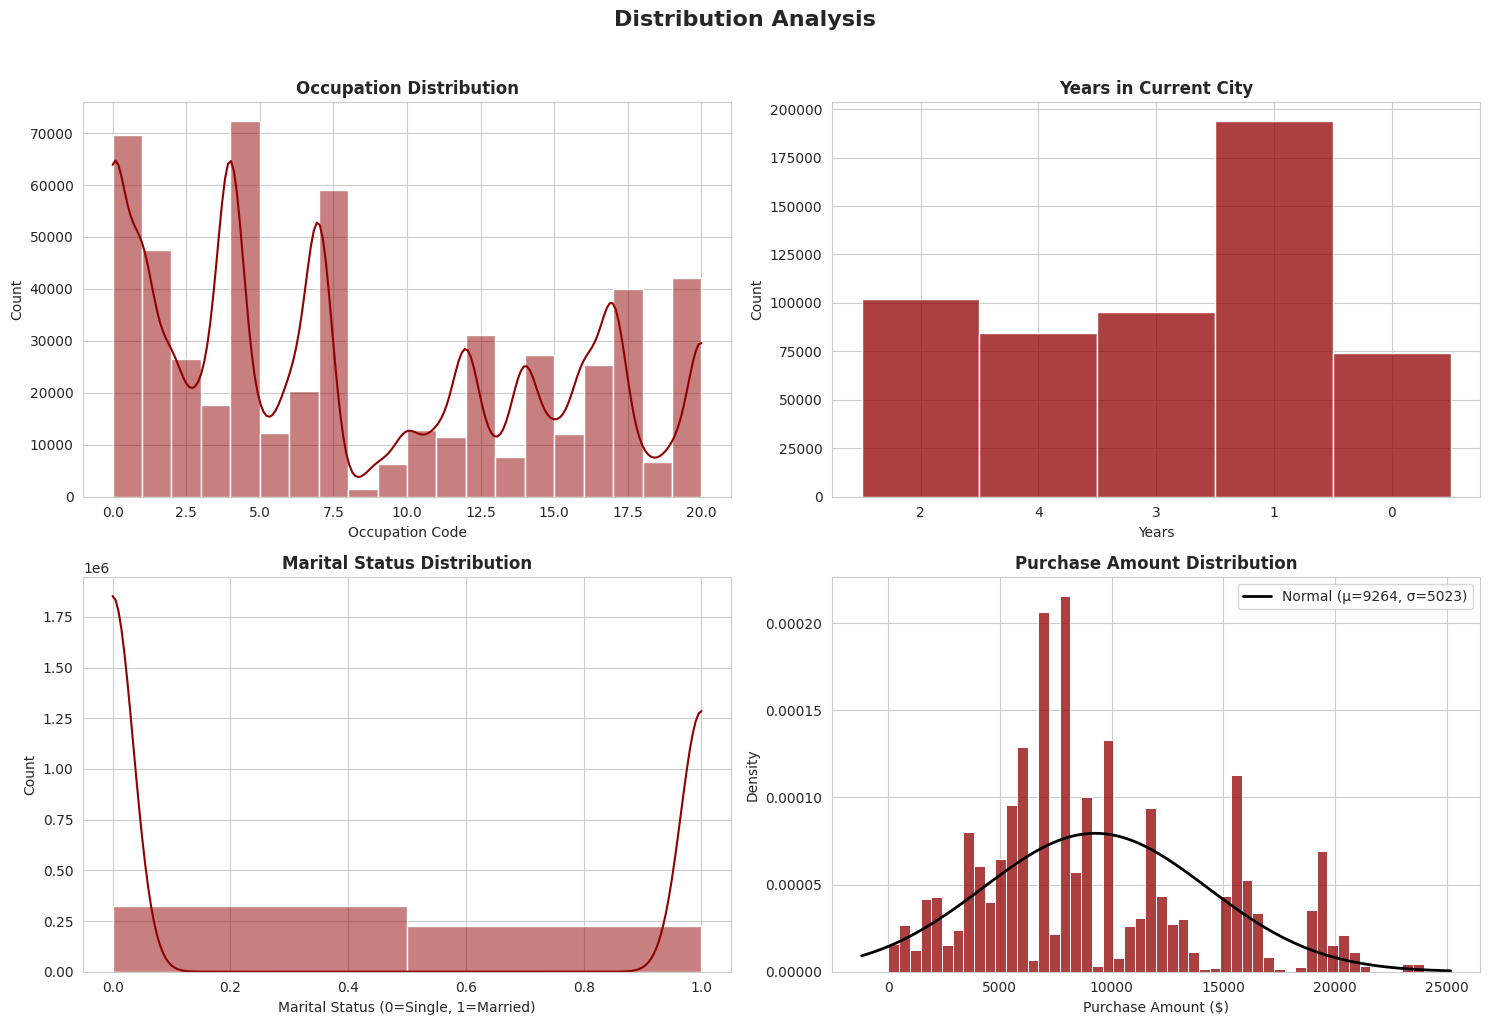

Purchase Distribution: μ=9263.97, σ=5023.06


In [53]:
print("Creating Exploratory Data Analysis Visualizations...")

# Figure 1: Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Analysis', fontsize=16, fontweight='bold', y=1.02)

# Occupation distribution
sns.histplot(df['Occupation'], kde=True, ax=axes[0,0], color='#900000', bins=20)
axes[0,0].set_title('Occupation Distribution', fontweight='bold')
axes[0,0].set_xlabel('Occupation Code')

# Stay in city distribution
sns.histplot(df['Stay_In_Current_City_Years'].astype(str),
              ax=axes[0,1], color='#900000')
axes[0,1].set_title('Years in Current City', fontweight='bold')
axes[0,1].set_xlabel('Years')

# Marital status
sns.histplot(df['Marital_Status'], kde=True, ax=axes[1,0],
              color='#900000', bins=2)
axes[1,0].set_title('Marital Status Distribution', fontweight='bold')
axes[1,0].set_xlabel('Marital Status (0=Single, 1=Married)')

# Purchase with normal curve
sns.histplot(df['Purchase'], kde=False, ax=axes[1,1],
              color='#900000', bins=50, stat='density')

# Fit normal distribution
from scipy.stats import norm
mu, sigma = norm.fit(df['Purchase'])
xmin, xmax = axes[1,1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
axes[1,1].plot(x, p, 'k', linewidth=2, label=f'Normal (μ={mu:.0f}, σ={sigma:.0f})')
axes[1,1].set_title('Purchase Amount Distribution', fontweight='bold')
axes[1,1].set_xlabel('Purchase Amount ($)')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('01_eda_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Purchase Distribution: μ={mu:.2f}, σ={sigma:.2f}")

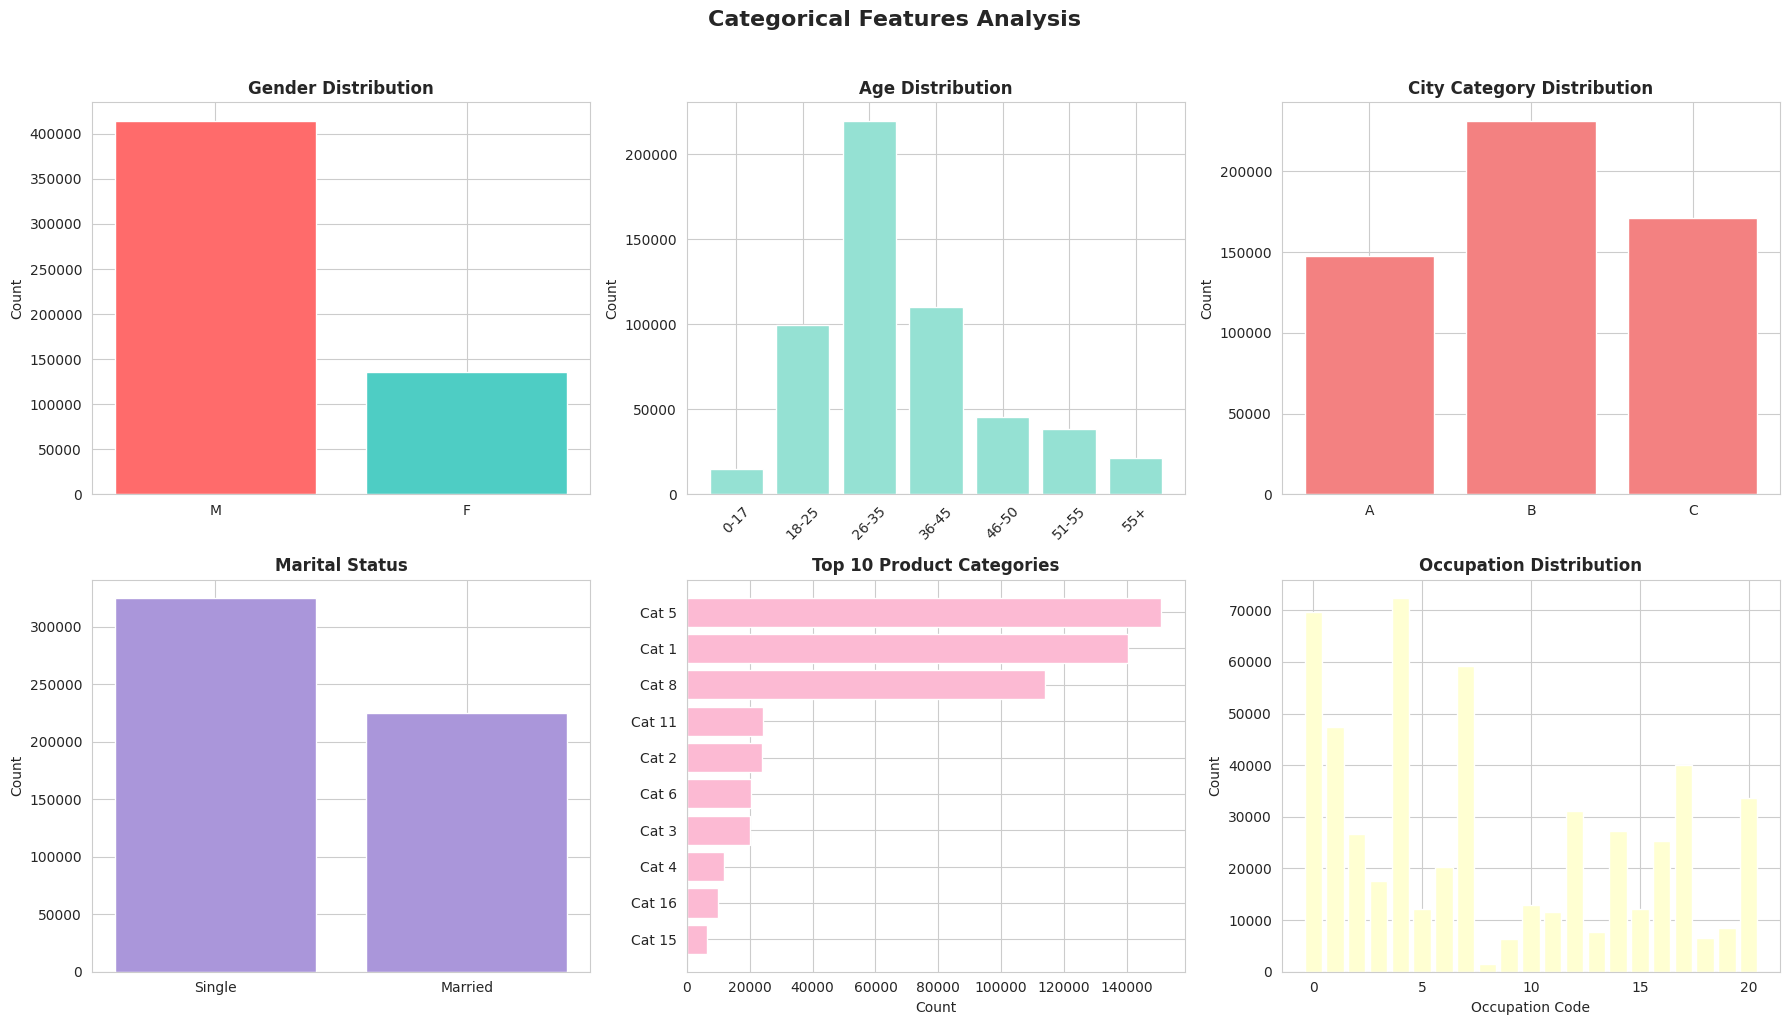

In [55]:
# Figure 2: Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Categorical Features Analysis', fontsize=16, fontweight='bold', y=1.02)

# Gender
gender_counts = df['Gender'].value_counts()
axes[0,0].bar(gender_counts.index, gender_counts.values, color=['#FF6B6B', '#4ECDC4'])
axes[0,0].set_title('Gender Distribution', fontweight='bold')
axes[0,0].set_ylabel('Count')

# Age
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_counts = df['Age'].value_counts().reindex(age_order)
axes[0,1].bar(range(len(age_counts)), age_counts.values, color='#95E1D3')
axes[0,1].set_xticks(range(len(age_counts)))
axes[0,1].set_xticklabels(age_counts.index, rotation=45)
axes[0,1].set_title('Age Distribution', fontweight='bold')
axes[0,1].set_ylabel('Count')

# City Category
city_counts = df['City_Category'].value_counts().sort_index()
axes[0,2].bar(city_counts.index, city_counts.values, color='#F38181')
axes[0,2].set_title('City Category Distribution', fontweight='bold')
axes[0,2].set_ylabel('Count')

# Marital Status
marital_counts = df['Marital_Status'].value_counts()
axes[1,0].bar(['Single', 'Married'], marital_counts.values, color='#AA96DA')
axes[1,0].set_title('Marital Status', fontweight='bold')
axes[1,0].set_ylabel('Count')

# Product Category (Top 10)
top_products = df['Product_Category'].value_counts().head(10)
axes[1,1].barh(range(len(top_products)), top_products.values, color='#FCBAD3')
axes[1,1].set_yticks(range(len(top_products)))
axes[1,1].set_yticklabels([f'Cat {i}' for i in top_products.index])
axes[1,1].set_title('Top 10 Product Categories', fontweight='bold')
axes[1,1].set_xlabel('Count')
axes[1,1].invert_yaxis()

# Occupation
occ_counts = df['Occupation'].value_counts().sort_index()
axes[1,2].bar(range(len(occ_counts)), occ_counts.values, color='#FFFFD2')
axes[1,2].set_title('Occupation Distribution', fontweight='bold')
axes[1,2].set_xlabel('Occupation Code')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.savefig('02_categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()


Creating Purchase Analysis Visualizations...


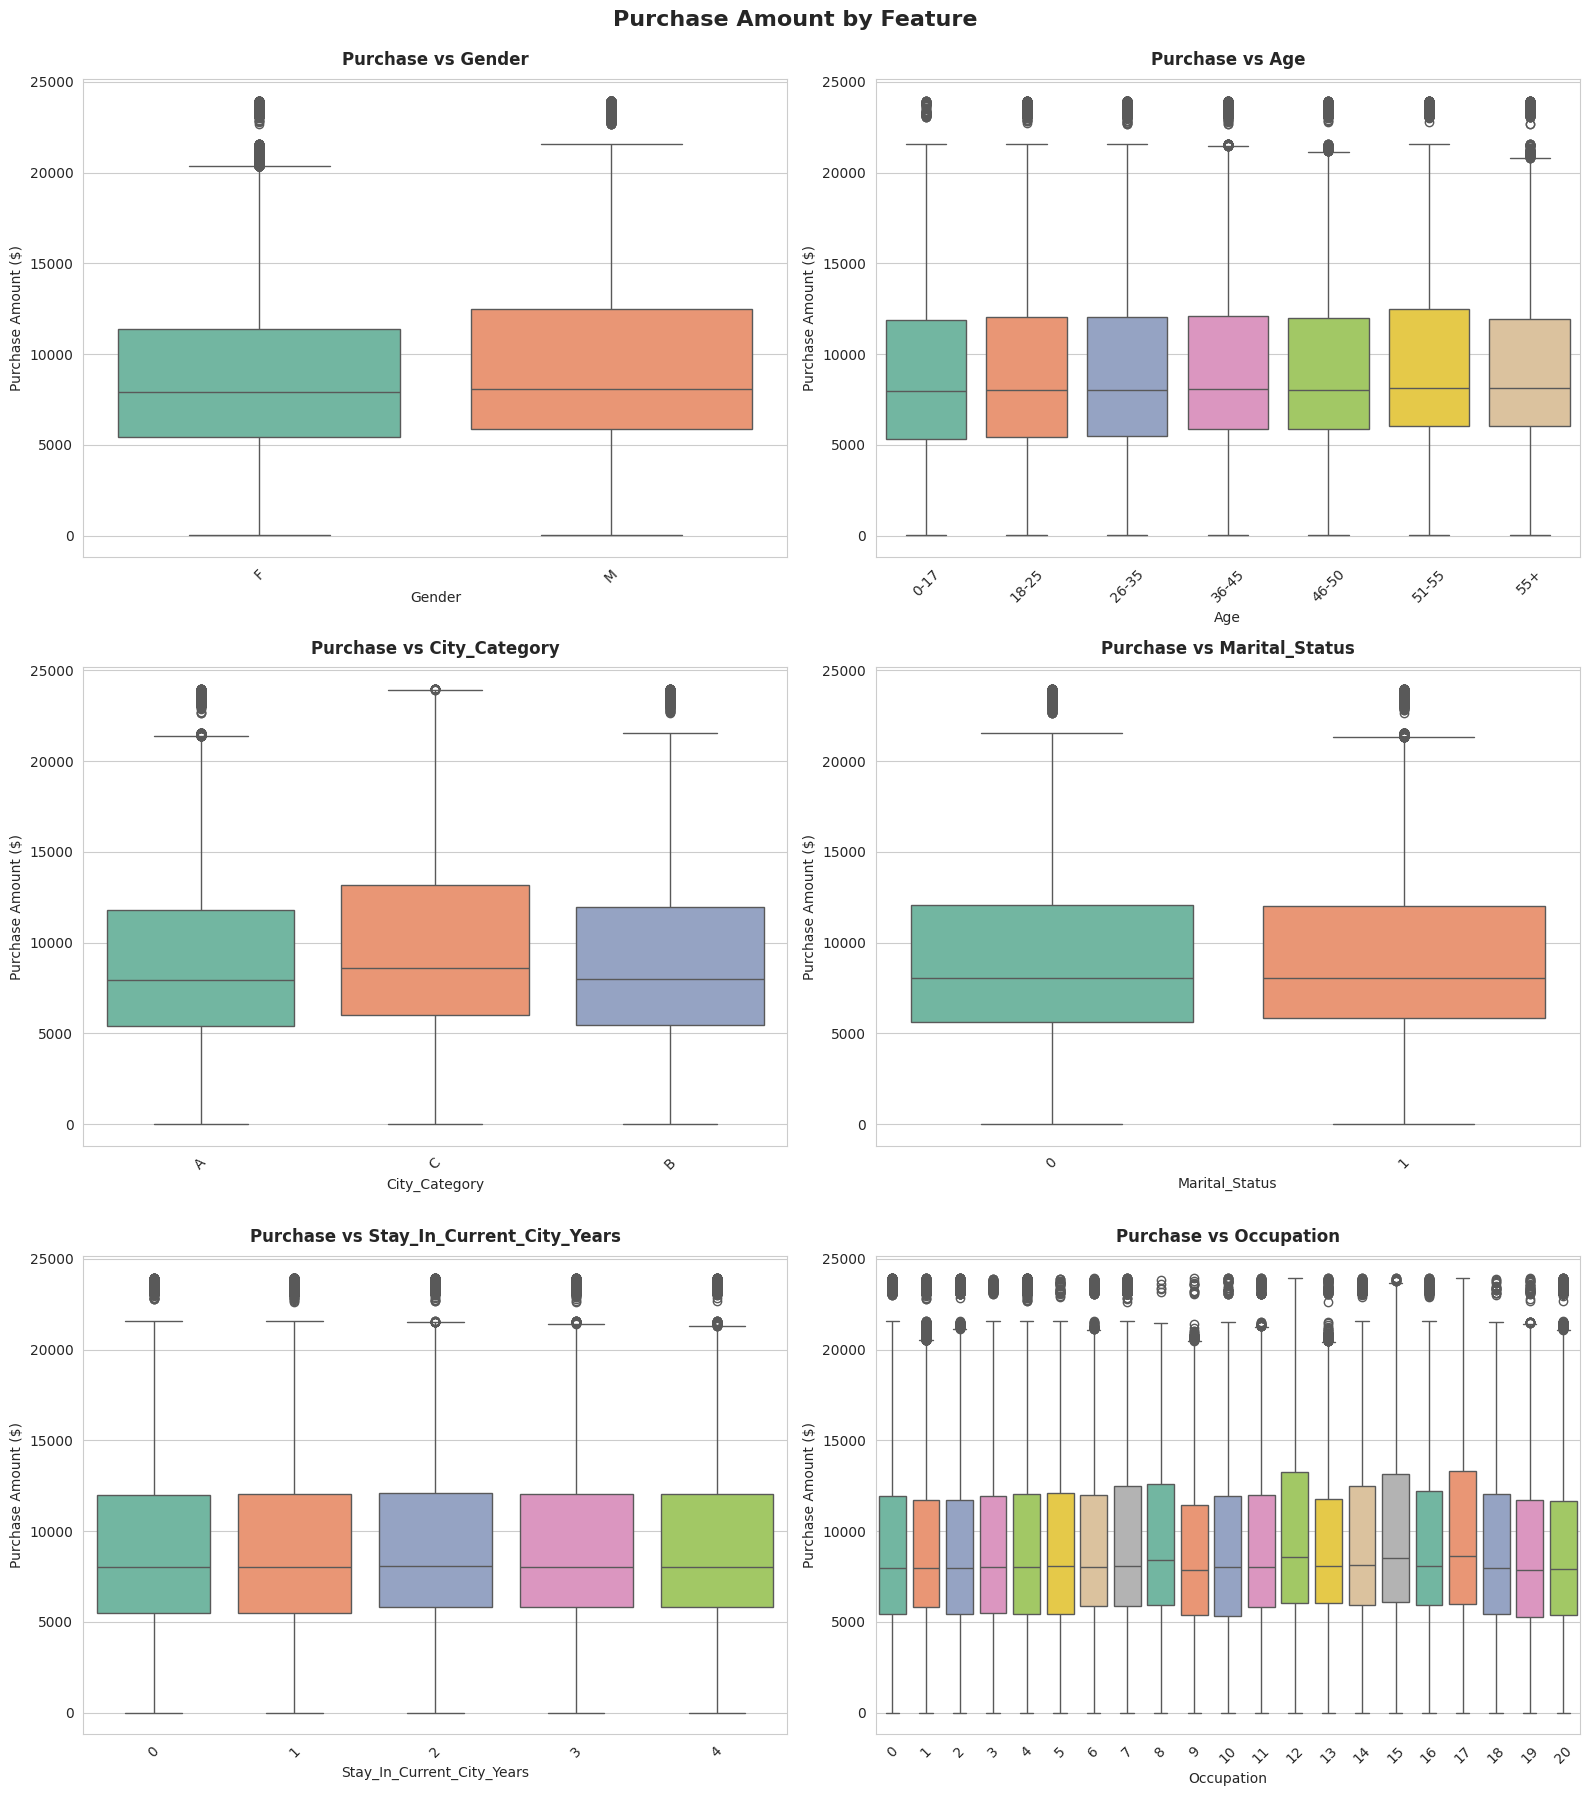

In [56]:
print("\nCreating Purchase Analysis Visualizations...")

features = ['Gender', 'Age', 'City_Category', 'Marital_Status',
            'Stay_In_Current_City_Years', 'Occupation']

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Purchase Amount by Feature', fontsize=16, fontweight='bold', y=0.995)

for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2

    if feature == 'Age':
        order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
        sns.boxplot(data=df, x=feature, y='Purchase', ax=axes[row, col],
                    order=order, palette='Set2')
    else:
        sns.boxplot(data=df, x=feature, y='Purchase', ax=axes[row, col],
                    palette='Set2')

    axes[row, col].set_title(f'Purchase vs {feature}', fontweight='bold', pad=10)
    axes[row, col].set_ylabel('Purchase Amount ($)')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('03_purchase_by_features.png', dpi=300, bbox_inches='tight')
plt.show()


Creating Feature Interaction Visualizations...


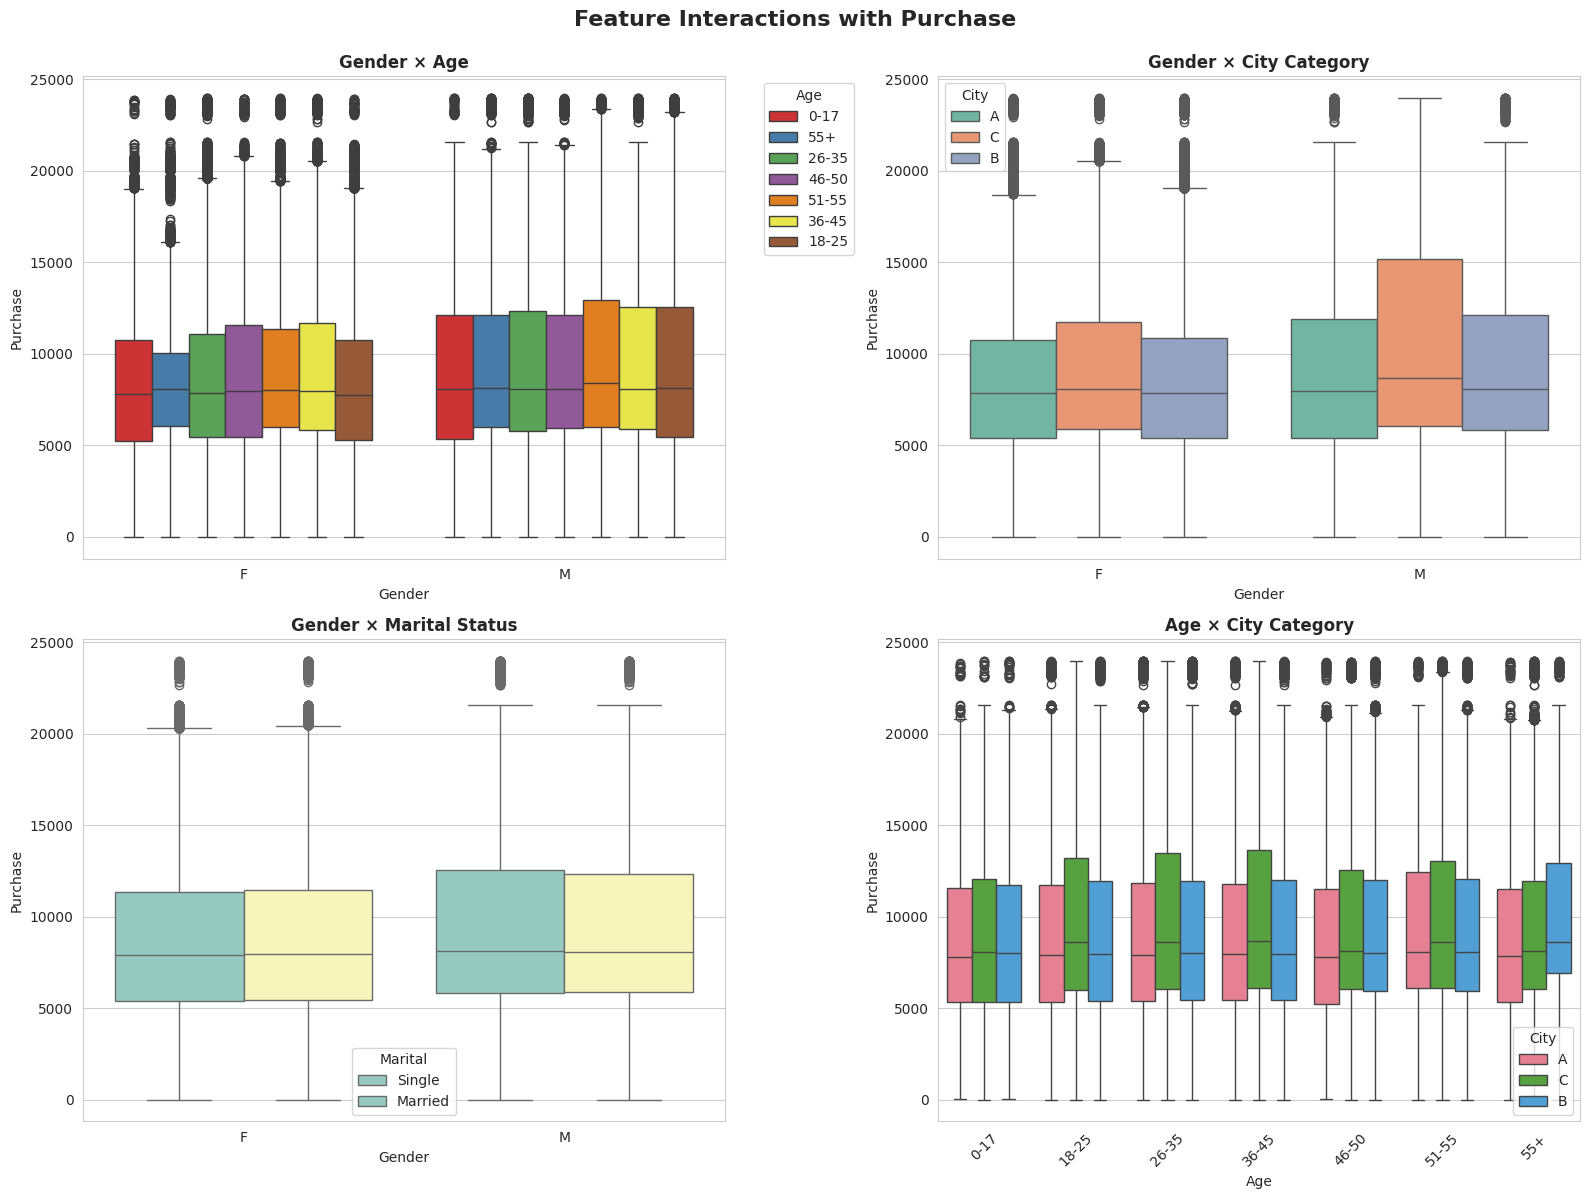

In [57]:
print("\nCreating Feature Interaction Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Interactions with Purchase', fontsize=16, fontweight='bold', y=0.995)

# Gender x Age
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Age', ax=axes[0,0], palette='Set1')
axes[0,0].set_title('Gender × Age', fontweight='bold')
axes[0,0].legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gender x City
sns.boxplot(data=df, x='Gender', y='Purchase', hue='City_Category',
            ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Gender × City Category', fontweight='bold')
axes[0,1].legend(title='City')

# Gender x Marital Status
sns.boxplot(data=df, x='Gender', y='Purchase', hue='Marital_Status',
            ax=axes[1,0], palette='Set3')
axes[1,0].set_title('Gender × Marital Status', fontweight='bold')
axes[1,0].legend(title='Marital', labels=['Single', 'Married'])

# Age x City
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.boxplot(data=df, x='Age', y='Purchase', hue='City_Category',
            ax=axes[1,1], order=age_order, palette='husl')
axes[1,1].set_title('Age × City Category', fontweight='bold')
axes[1,1].legend(title='City')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('04_feature_interactions.png', dpi=300, bbox_inches='tight')
plt.show()


Creating Gender Spending Analysis...


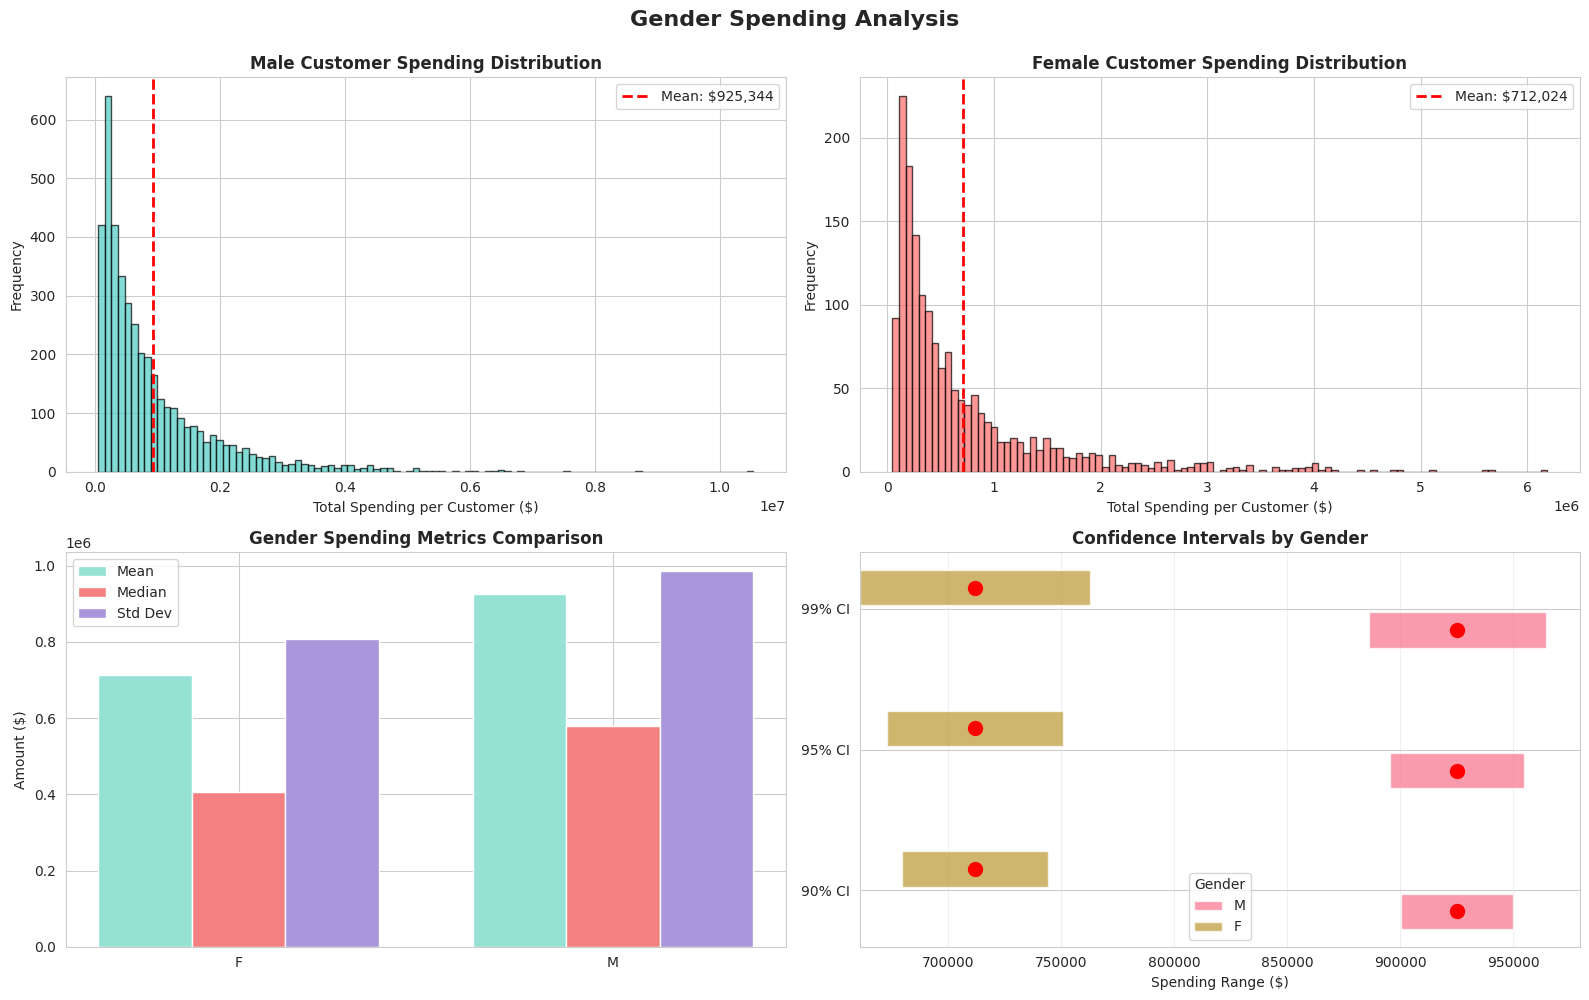


Gender Spending Statistics:
  Male: Mean=$925,344.40, Median=$578,540.00
  Female: Mean=$712,024.39, Median=$407,263.00


In [58]:
print("\nCreating Gender Spending Analysis...")

# Calculate total spending per user
user_spending = df.groupby(['User_ID', 'Gender'])['Purchase'].sum().reset_index()

male_spending = user_spending[user_spending['Gender'] == 'M']['Purchase']
female_spending = user_spending[user_spending['Gender'] == 'F']['Purchase']

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Gender Spending Analysis', fontsize=16, fontweight='bold', y=0.995)

# Male distribution
axes[0,0].hist(male_spending, bins=100, color='#4ECDC4', alpha=0.7, edgecolor='black')
axes[0,0].axvline(male_spending.mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Mean: ${male_spending.mean():,.0f}')
axes[0,0].set_title('Male Customer Spending Distribution', fontweight='bold')
axes[0,0].set_xlabel('Total Spending per Customer ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Female distribution
axes[0,1].hist(female_spending, bins=100, color='#FF6B6B', alpha=0.7, edgecolor='black')
axes[0,1].axvline(female_spending.mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Mean: ${female_spending.mean():,.0f}')
axes[0,1].set_title('Female Customer Spending Distribution', fontweight='bold')
axes[0,1].set_xlabel('Total Spending per Customer ($)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Comparison bar chart
gender_stats = user_spending.groupby('Gender')['Purchase'].agg(['mean', 'median', 'std'])
x = np.arange(len(gender_stats))
width = 0.25

axes[1,0].bar(x - width, gender_stats['mean'], width, label='Mean', color='#95E1D3')
axes[1,0].bar(x, gender_stats['median'], width, label='Median', color='#F38181')
axes[1,0].bar(x + width, gender_stats['std'], width, label='Std Dev', color='#AA96DA')
axes[1,0].set_title('Gender Spending Metrics Comparison', fontweight='bold')
axes[1,0].set_ylabel('Amount ($)')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(gender_stats.index)
axes[1,0].legend()

# Confidence intervals
confidence_levels = [90, 95, 99]
z_scores = [1.64, 1.96, 2.58]

ci_data = []
for conf, z in zip(confidence_levels, z_scores):
    for gender in ['M', 'F']:
        spending = user_spending[user_spending['Gender'] == gender]['Purchase']
        mean = spending.mean()
        std = spending.std()
        n = len(spending)
        margin = z * std / np.sqrt(n)
        ci_data.append({
            'Gender': gender,
            'Confidence': f'{conf}%',
            'Lower': mean - margin,
            'Upper': mean + margin,
            'Mean': mean
        })

ci_df = pd.DataFrame(ci_data)

# Plot confidence intervals
for i, gender in enumerate(['M', 'F']):
    gender_ci = ci_df[ci_df['Gender'] == gender]
    y_pos = np.arange(len(gender_ci)) + i * 0.3

    axes[1,1].barh(y_pos,
                  gender_ci['Upper'] - gender_ci['Lower'],
                  left=gender_ci['Lower'],
                  height=0.25,
                  label=gender,
                  alpha=0.7)

    # Add mean markers
    axes[1,1].scatter(gender_ci['Mean'], y_pos, color='red', s=100, zorder=3)

axes[1,1].set_yticks(np.arange(len(confidence_levels)) + 0.15)
axes[1,1].set_yticklabels([f'{c}% CI' for c in confidence_levels])
axes[1,1].set_title('Confidence Intervals by Gender', fontweight='bold')
axes[1,1].set_xlabel('Spending Range ($)')
axes[1,1].legend(title='Gender')
axes[1,1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('05_gender_spending_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print(f"\nGender Spending Statistics:")
print(f"  Male: Mean=${male_spending.mean():,.2f}, Median=${male_spending.median():,.2f}")
print(f"  Female: Mean=${female_spending.mean():,.2f}, Median=${female_spending.median():,.2f}")


Creating Store Allocation Visualizations...


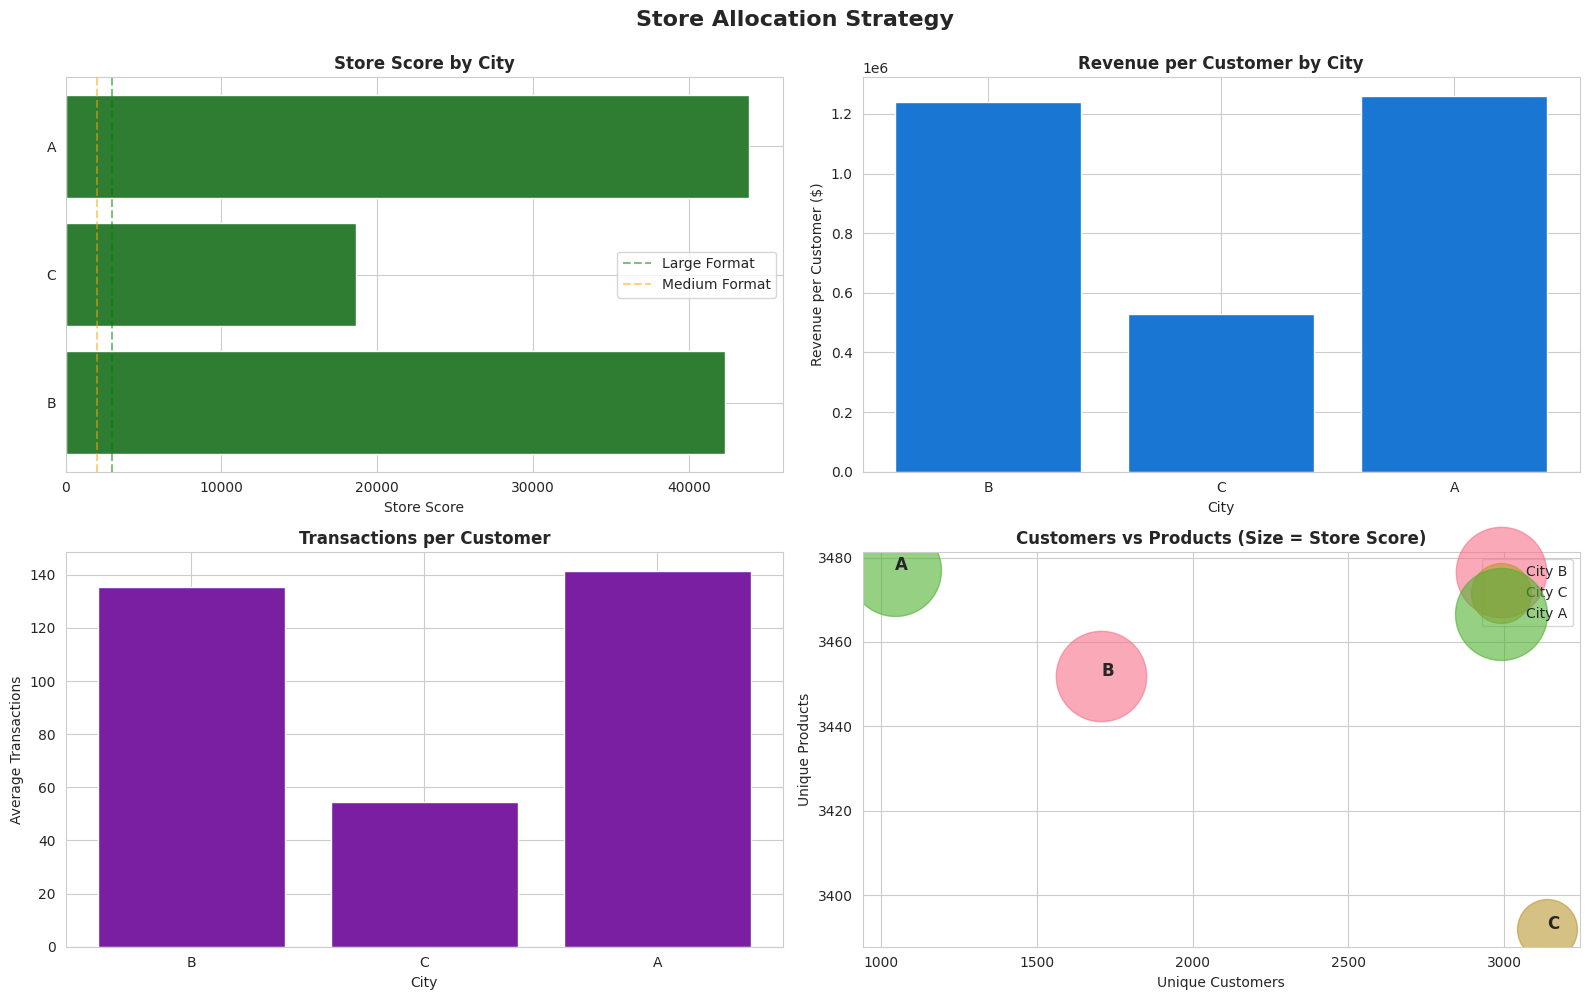

In [66]:
print("\nCreating Store Allocation Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Store Allocation Strategy', fontsize=16, fontweight='bold', y=0.995)

# Store scores
colors = ['#2E7D32' if s > 3000 else '#F57C00' if s > 2000 else '#C62828'
          for s in store_df['Store_Score']]
axes[0,0].barh(store_df['City'], store_df['Store_Score'], color=colors)
axes[0,0].set_title('Store Score by City', fontweight='bold')
axes[0,0].set_xlabel('Store Score')
axes[0,0].axvline(3000, color='green', linestyle='--', alpha=0.5, label='Large Format')
axes[0,0].axvline(2000, color='orange', linestyle='--', alpha=0.5, label='Medium Format')
axes[0,0].legend()

# Revenue per customer
axes[0,1].bar(store_df['City'], store_df['Revenue_Per_Customer'], color='#1976D2')
axes[0,1].set_title('Revenue per Customer by City', fontweight='bold')
axes[0,1].set_ylabel('Revenue per Customer ($)')
axes[0,1].set_xlabel('City')

# Transactions per customer
axes[1,0].bar(store_df['City'], store_df['Trans_Per_Customer'], color='#7B1FA2')
axes[1,0].set_title('Transactions per Customer', fontweight='bold')
axes[1,0].set_ylabel('Average Transactions')
axes[1,0].set_xlabel('City')

# Customer vs Product scatter
for idx, row in store_df.iterrows():
    size = row['Store_Score'] / 10
    axes[1,1].scatter(row['Unique_Customers'], row['Unique_Products'],
                      s=size, alpha=0.6, label=f"City {row['City']}")
    axes[1,1].annotate(row['City'],
                      (row['Unique_Customers'], row['Unique_Products']),
                      fontsize=12, fontweight='bold')

axes[1,1].set_title('Customers vs Products (Size = Store Score)', fontweight='bold')
axes[1,1].set_xlabel('Unique Customers')
axes[1,1].set_ylabel('Unique Products')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('06_store_allocation.png', dpi=300, bbox_inches='tight')
plt.show()

def visualize_product_affinity(affinity_df):
    """
    Visualize product affinity analysis
    """
    print("\nCreating Product Affinity Visualizations...")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Product Affinity Analysis (Market Basket)', fontsize=16, fontweight='bold')

    # Top affinity pairs
    top_15 = affinity_df.head(15)
    pairs = [f"{row['Category_1']}-{row['Category_2']}" for _, row in top_15.iterrows()]

    axes[0].barh(range(len(top_15)), top_15['Co_Occurrences'], color='#7C3AED')
    axes[0].set_yticks(range(len(top_15)))
    axes[0].set_yticklabels(pairs)
    axes[0].set_title('Top 15 Product Pairs (Co-Occurrences)', fontweight='bold')
    axes[0].set_xlabel('Number of Co-Occurrences')
    axes[0].invert_yaxis()

    # Lift scores
    colors = ['#2E7D32' if l > 1.5 else '#F57C00' if l > 1.2 else '#757575'
              for l in top_15['Lift']]
    axes[1].barh(range(len(top_15)), top_15['Lift'], color=colors)
    axes[1].set_yticks(range(len(top_15)))
    axes[1].set_yticklabels(pairs)
    axes[1].set_title('Lift Scores (Green=Strong Bundle, Orange=Cross-sell)', fontweight='bold')
    axes[1].set_xlabel('Lift Score')
    axes[1].axvline(1.5, color='green', linestyle='--', alpha=0.5)
    axes[1].axvline(1.2, color='orange', linestyle='--', alpha=0.5)
    axes[1].invert_yaxis()

    plt.tight_layout()
    plt.savefig('07_product_affinity.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_inventory_optimization(inventory_df):
    """
    Visualize inventory optimization results
    """
    print("\nCreating Inventory Optimization Visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Inventory Optimization Strategy', fontsize=16, fontweight='bold', y=0.995)

    # Priority scores (top 15)
    top_15 = inventory_df.head(15)
    colors = ['#D32F2F' if l == 'High' else '#F57C00' if l == 'Medium' else '#388E3C'
              for l in top_15['Stock_Level']]

    axes[0,0].barh(range(len(top_15)), top_15['Priority_Score'], color=colors)
    axes[0,0].set_yticks(range(len(top_15)))
    axes[0,0].set_yticklabels([f"Cat {c}" for c in top_15['Category']])
    axes[0,0].set_title('Priority Scores (Red=High, Orange=Med, Green=Low)', fontweight='bold')
    axes[0,0].set_xlabel('Priority Score')
    axes[0,0].invert_yaxis()

    # Velocity vs Revenue Share scatter
    axes[0,1].scatter(inventory_df['Velocity'], inventory_df['Revenue_Share'], # Corrected column name
                     s=inventory_df['Priority_Score']*20, alpha=0.6, c=inventory_df['Priority_Score'],
                     cmap='RdYlGn_r')
    axes[0,1].set_title('Velocity vs Revenue Share (Size=Priority)', fontweight='bold')
    axes[0,1].set_xlabel('Velocity (trans/day/product)')
    axes[0,1].set_ylabel('Revenue Share (%)')
    axes[0,1].grid(alpha=0.3)

    # Stock level distribution
    stock_counts = inventory_df['Stock_Level'].value_counts()
    axes[1,0].pie(stock_counts, labels=stock_counts.index, autopct='%1.1f%%',
                 colors=['#D32F2F', '#F57C00', '#388E3C'], startangle=90)
    axes[1,0].set_title('Stock Level Distribution', fontweight='bold')

    # Revenue by stock level
    revenue_by_stock = inventory_df.groupby('Stock_Level')['Revenue'].sum().reindex(['High', 'Medium', 'Low'])
    axes[1,1].bar(range(len(revenue_by_stock)), revenue_by_stock.values,
                 color=['#D32F2F', '#F57C00', '#388E3C'])
    axes[1,1].set_xticks(range(len(revenue_by_stock)))
    axes[1,1].set_xticklabels(revenue_by_stock.index)
    axes[1,1].set_title('Total Revenue by Stock Level', fontweight='bold')
    axes[1,1].set_ylabel('Revenue ($)')

    plt.tight_layout()
    plt.savefig('08_inventory_optimization.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_marketing_roi(roi_df):


    print("\nCreating Marketing ROI Visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Marketing ROI by Segment', fontsize=16, fontweight='bold', y=0.995)

    # Top 20 segments by attractiveness
    top_20 = roi_df.head(20)

    # ROI by segment
    colors = ['#2E7D32' if r == 'Invest Heavy' else '#1976D2' if r == 'Invest Moderate' else '#757575'
              for r in top_20['Recommendation']]
    axes[0,0].barh(range(len(top_20)), top_20['ROI_Percent'], color=colors)
    axes[0,0].set_yticks(range(len(top_20)))
    axes[0,0].set_yticklabels(top_20['Segment'], fontsize=8)
    axes[0,0].set_title('ROI by Segment (Top 20)', fontweight='bold')
    axes[0,0].set_xlabel('ROI (%)')
    axes[0,0].invert_yaxis()

    # CLV vs ROI scatter
    axes[0,1].scatter(top_20['CLV_Proxy'], top_20['ROI_Percent'],
                     s=top_20['Customers']/10, alpha=0.6,
                     c=top_20['Attractiveness_Score'], cmap='viridis')
    axes[0,1].set_title('CLV vs ROI (Size=Customers, Color=Attractiveness)', fontweight='bold')
    axes[0,1].set_xlabel('CLV Proxy ($)')
    axes[0,1].set_ylabel('ROI (%)')
    axes[0,1].grid(alpha=0.3)

    # Investment recommendation distribution
    rec_counts = roi_df['Recommendation'].value_counts()
    axes[1,0].pie(rec_counts, labels=rec_counts.index, autopct='%1.1f%%',
                 colors=['#2E7D32', '#1976D2', '#757575'], startangle=90)
    axes[1,0].set_title('Investment Recommendation Distribution', fontweight='bold')

    # Attractiveness scores
    axes[1,1].barh(range(len(top_20)), top_20['Attractiveness_Score'], color='#7C3AED')
    axes[1,1].set_yticks(range(len(top_20)))
    axes[1,1].set_yticklabels(top_20['Segment'], fontsize=8)
    axes[1,1].set_title('Attractiveness Score (Top 20)', fontweight='bold')
    axes[1,1].set_xlabel('Attractiveness Score')
    axes[1,1].invert_yaxis()

    plt.tight_layout()
    plt.savefig('09_marketing_roi.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_cohort_analysis(cohort_df):
    """
    Visualize cohort analysis results
    """
    print("\nCreating Cohort Analysis Visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Cohort Analysis (City Tenure)', fontsize=16, fontweight='bold', y=0.995)

    # Revenue per customer
    axes[0,0].bar(range(len(cohort_df)), cohort_df['Revenue_Per_Customer'], color='#1976D2')
    axes[0,0].set_xticks(range(len(cohort_df)))
    axes[0,0].set_xticklabels(cohort_df['Cohort'], rotation=45)
    axes[0,0].set_title('Revenue per Customer by Cohort', fontweight='bold')
    axes[0,0].set_ylabel('Revenue per Customer ($)')
    axes[0,0].grid(axis='y', alpha=0.3)

    # Purchase frequency
    axes[0,1].plot(cohort_df['Cohort'], cohort_df['Frequency'], marker='o',
                  linewidth=2, markersize=10, color='#7C3AED')
    axes[0,1].set_title('Purchase Frequency by Cohort', fontweight='bold')
    axes[0,1].set_ylabel('Average Frequency')
    axes[0,1].set_xlabel('Cohort')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(alpha=0.3)

    # Engagement score
    axes[1,0].bar(range(len(cohort_df)), cohort_df['Engagement_Score'], color='#F57C00')
    axes[1,0].set_xticks(range(len(cohort_df)))
    axes[1,0].set_xticklabels(cohort_df['Cohort'], rotation=45)
    axes[1,0].set_title('Engagement Score by Cohort', fontweight='bold')
    axes[1,0].set_ylabel('Engagement Score')
    axes[1,0].grid(axis='y', alpha=0.3)

    # Customer count
    axes[1,1].bar(range(len(cohort_df)), cohort_df['Customers'], color='#2E7D32')
    axes[1,1].set_xticks(range(len(cohort_df)))
    axes[1,1].set_xticklabels(cohort_df['Cohort'], rotation=45)
    axes[1,1].set_title('Number of Customers by Cohort', fontweight='bold')
    axes[1,1].set_ylabel('Customers')
    axes[1,1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('10_cohort_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_extensions(elasticity_df, clv_df):
    """
    Visualize price elasticity and CLV analysis
    """
    print("\nCreating Extension Analysis Visualizations...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Advanced Extensions: Elasticity & CLV', fontsize=16, fontweight='bold', y=0.995)

    # Price elasticity (top 15)
    top_15_elastic = elasticity_df.head(15)
    colors = ['#2E7D32' if e < -1 and e > -1 else '#D32F2F'
              for e in top_15_elastic['Elasticity']]

    axes[0,0].barh(range(len(top_15_elastic)), top_15_elastic['Elasticity'], color=colors)
    axes[0,0].set_yticks(range(len(top_15_elastic)))
    axes[0,0].set_yticklabels([f"Cat {c}" for c in top_15_elastic['Category']])
    axes[0,0].set_title('Price Elasticity (Green=Inelastic, Red=Elastic)', fontweight='bold')
    axes[0,0].set_xlabel('Elasticity')
    axes[0,0].axvline(-1, color='black', linestyle='--', alpha=0.5)
    axes[0,0].invert_yaxis()

    # CLV by segment (top 15)
    top_15_clv = clv_df.head(15)
    axes[0,1].barh(range(len(top_15_clv)), top_15_clv['Net_CLV'], color='#1976D2')
    axes[0,1].set_yticks(range(len(top_15_clv)))
    axes[0,1].set_yticklabels(top_15_clv['Segment'], fontsize=8)
    axes[0,1].set_title('Net CLV by Segment (Top 15)', fontweight='bold')
    axes[0,1].set_xlabel('Net CLV ($)')
    axes[0,1].invert_yaxis()

    # LTV:CAC ratio
    axes[1,0].scatter(top_15_clv['Gross_CLV'], top_15_clv['LTV_CAC_Ratio'],
                     s=top_15_clv['Customers']/5, alpha=0.6, c=top_15_clv['Net_CLV'],
                     cmap='RdYlGn')
    axes[1,0].axhline(3, color='green', linestyle='--', alpha=0.5, label='Target 3:1')
    axes[1,0].set_title('LTV:CAC Ratio (Size=Customers)', fontweight='bold')
    axes[1,0].set_xlabel('Gross CLV ($)')
    axes[1,0].set_ylabel('LTV:CAC Ratio')
    axes[1,0].legend()
    axes[1,0].grid(alpha=0.3)

    # Payback period
    top_15_clv_sorted = top_15_clv.sort_values('Payback_Months')
    axes[1,1].barh(range(len(top_15_clv_sorted)), top_15_clv_sorted['Payback_Months'],
                  color='#7C3AED')
    axes[1,1].set_yticks(range(len(top_15_clv_sorted)))
    axes[1,1].set_yticklabels(top_15_clv_sorted['Segment'], fontsize=8)
    axes[1,1].set_title('Payback Period (Months)', fontweight='bold')
    axes[1,1].set_xlabel('Months')
    axes[1,1].axvline(12, color='orange', linestyle='--', alpha=0.5, label='Target <12mo')
    axes[1,1].legend()
    axes[1,1].invert_yaxis()

    plt.tight_layout()
    plt.savefig('11_extensions_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()


Creating Product Affinity Visualizations...


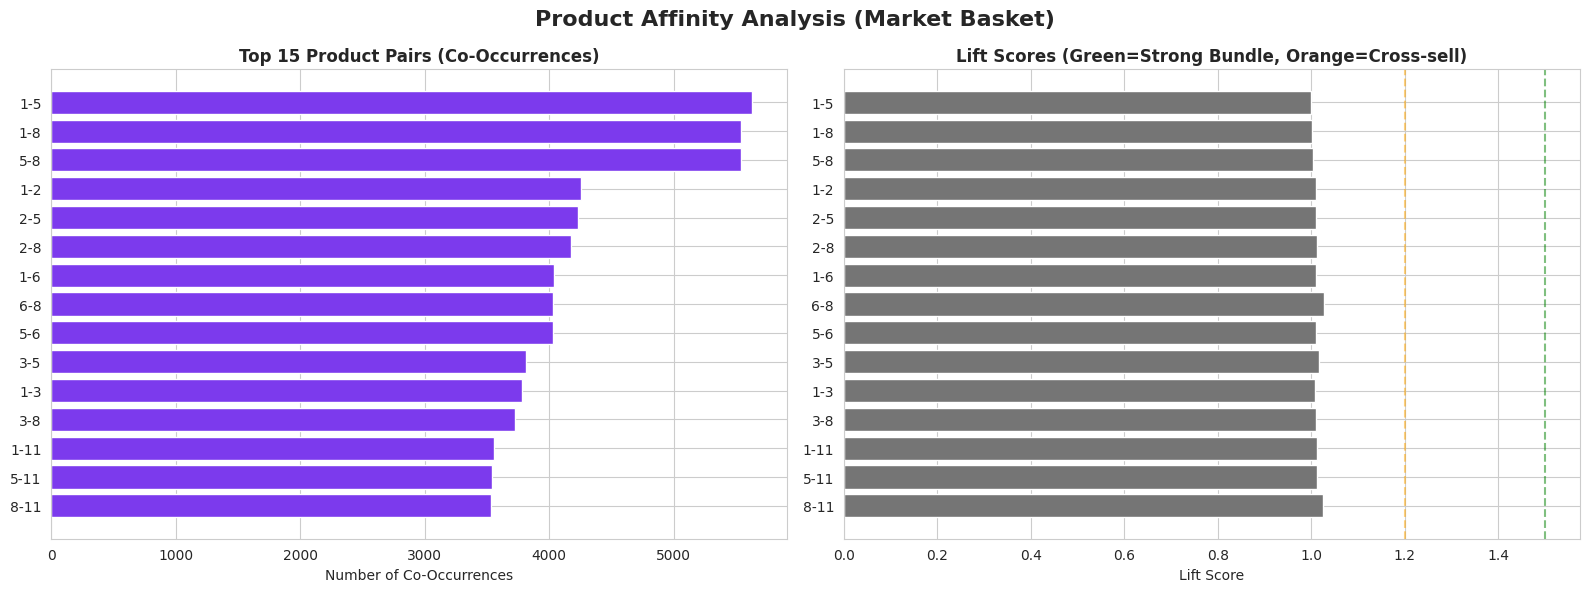


Creating Inventory Optimization Visualizations...


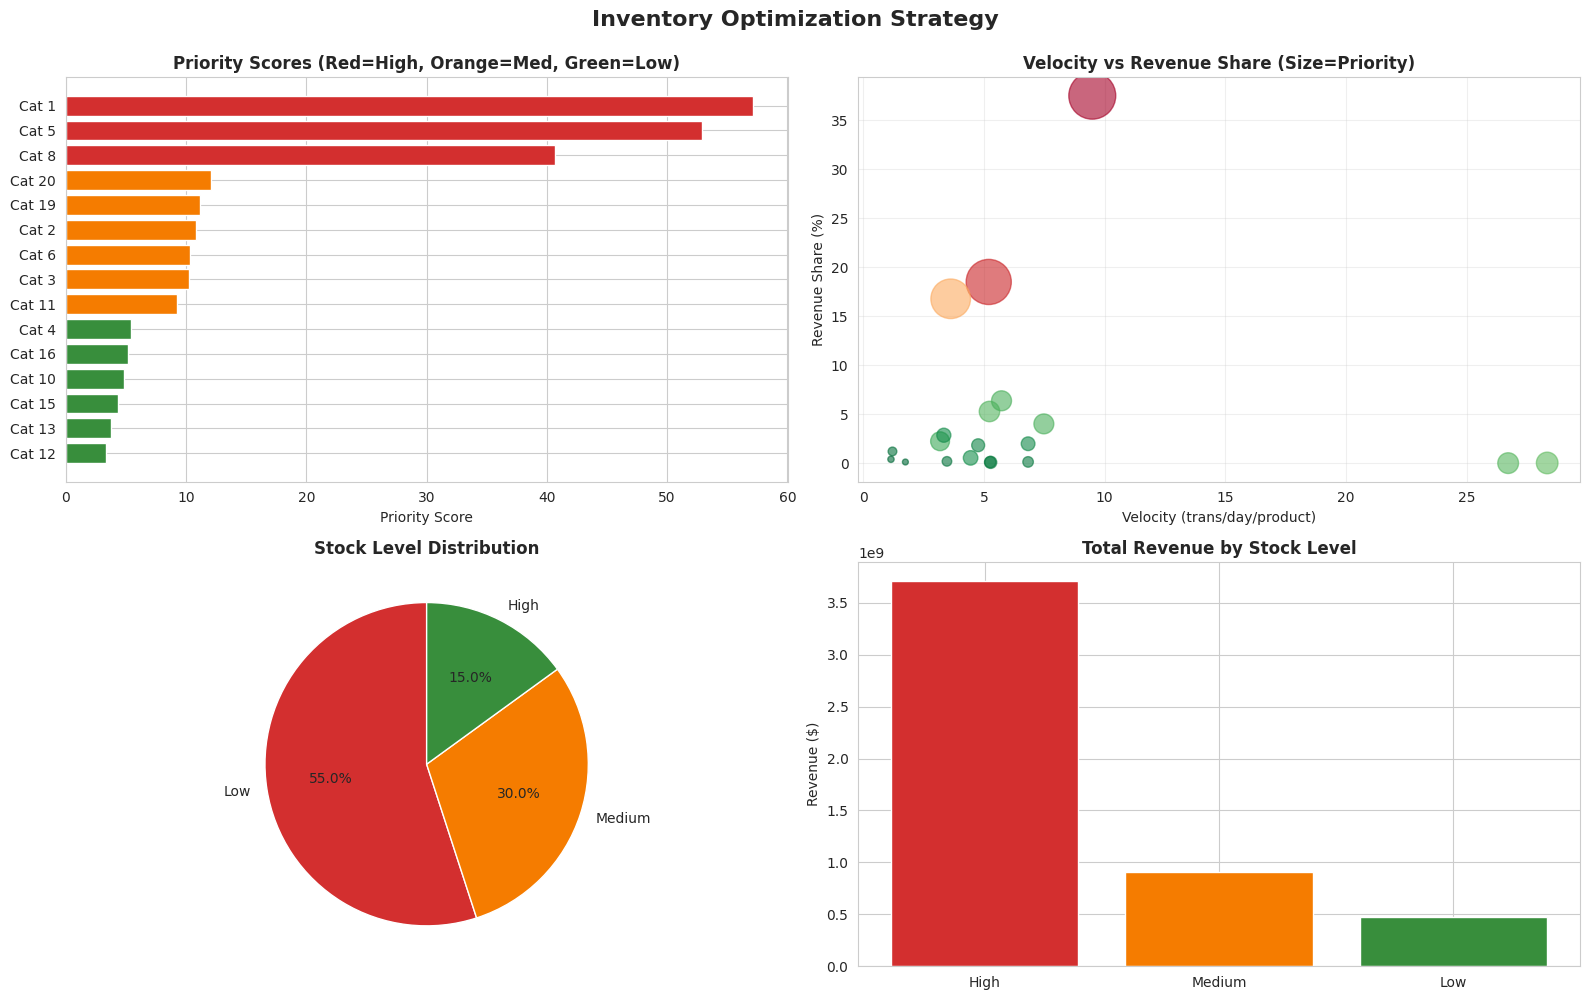


Creating Marketing ROI Visualizations...


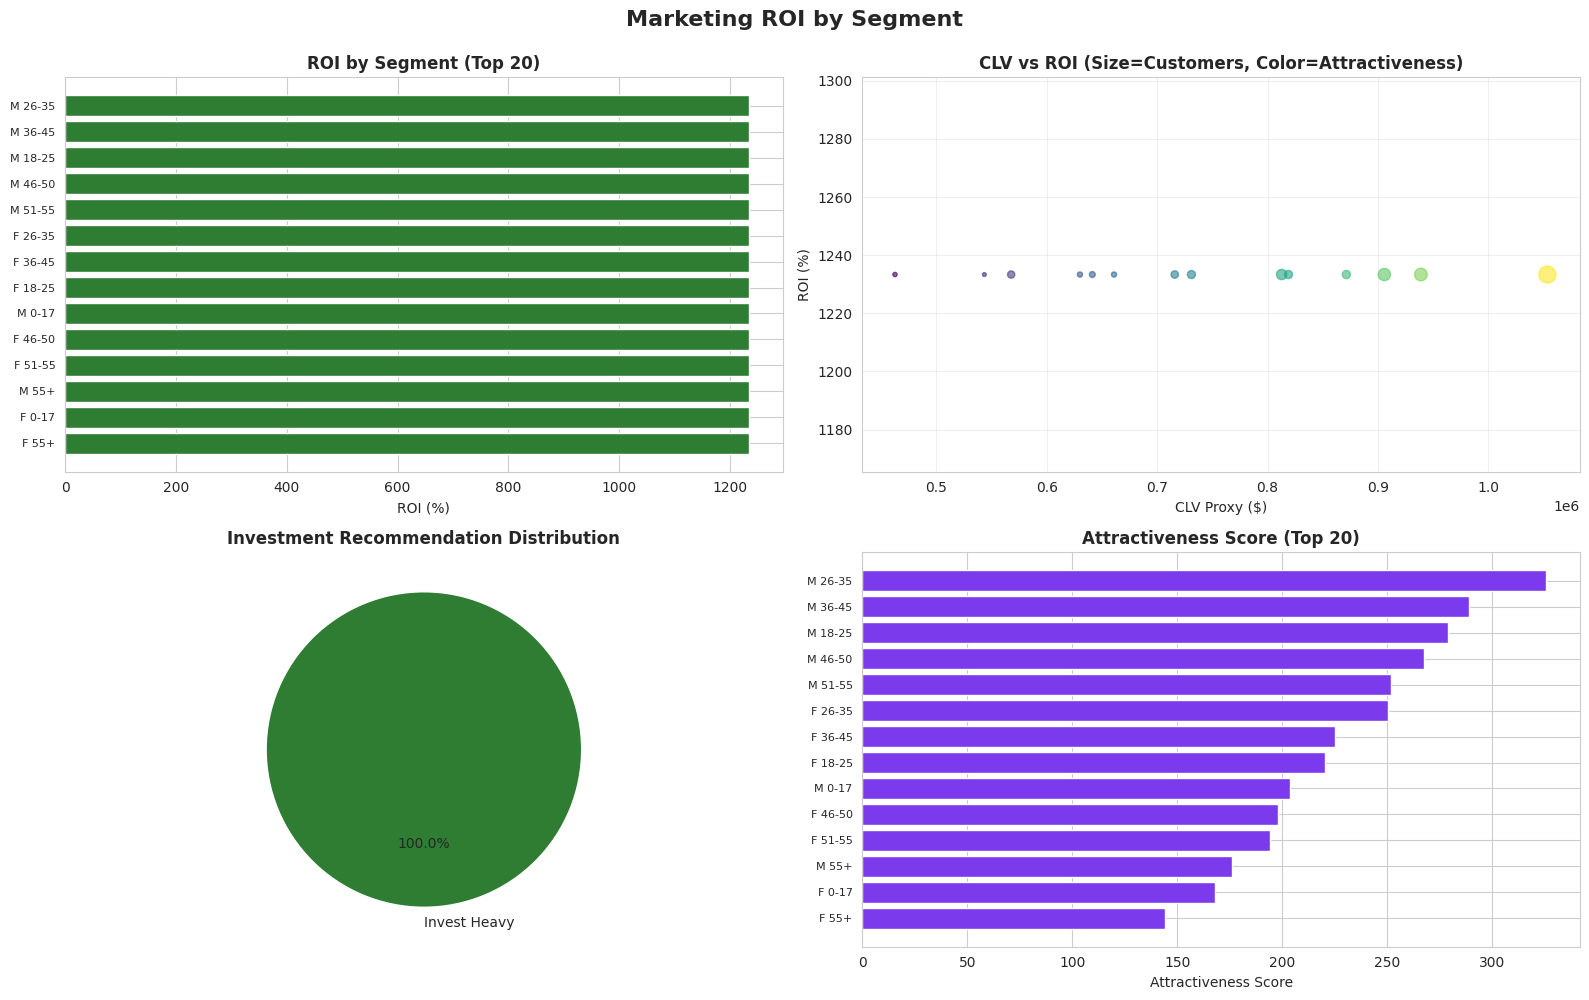


Creating Cohort Analysis Visualizations...


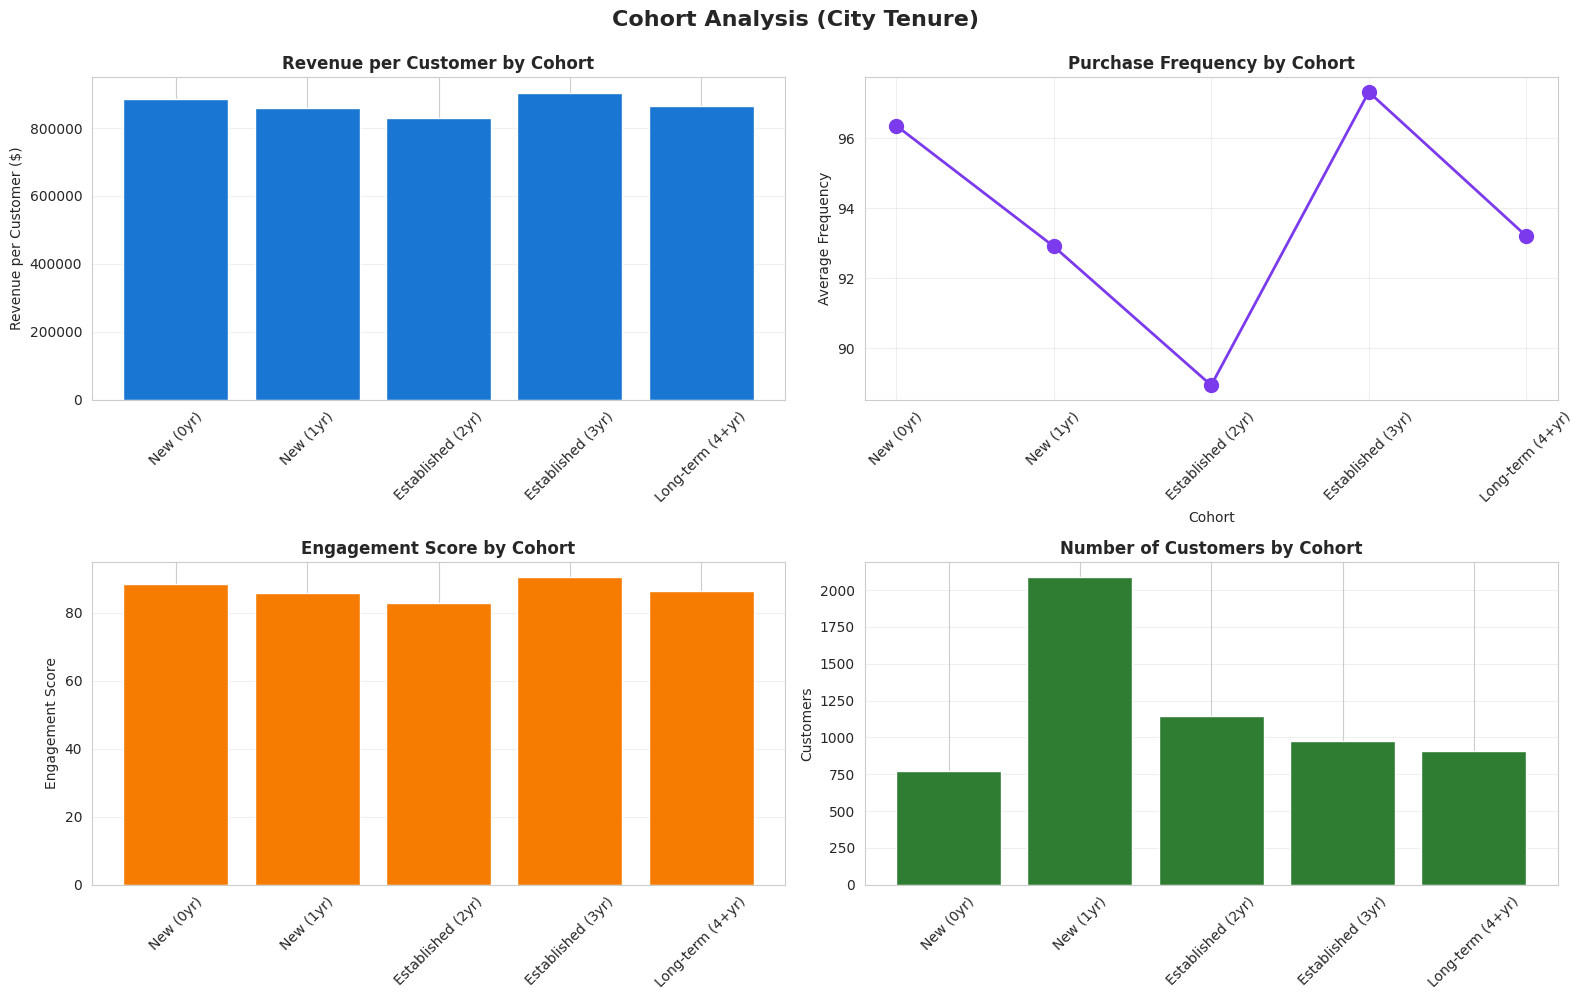


Creating Extension Analysis Visualizations...


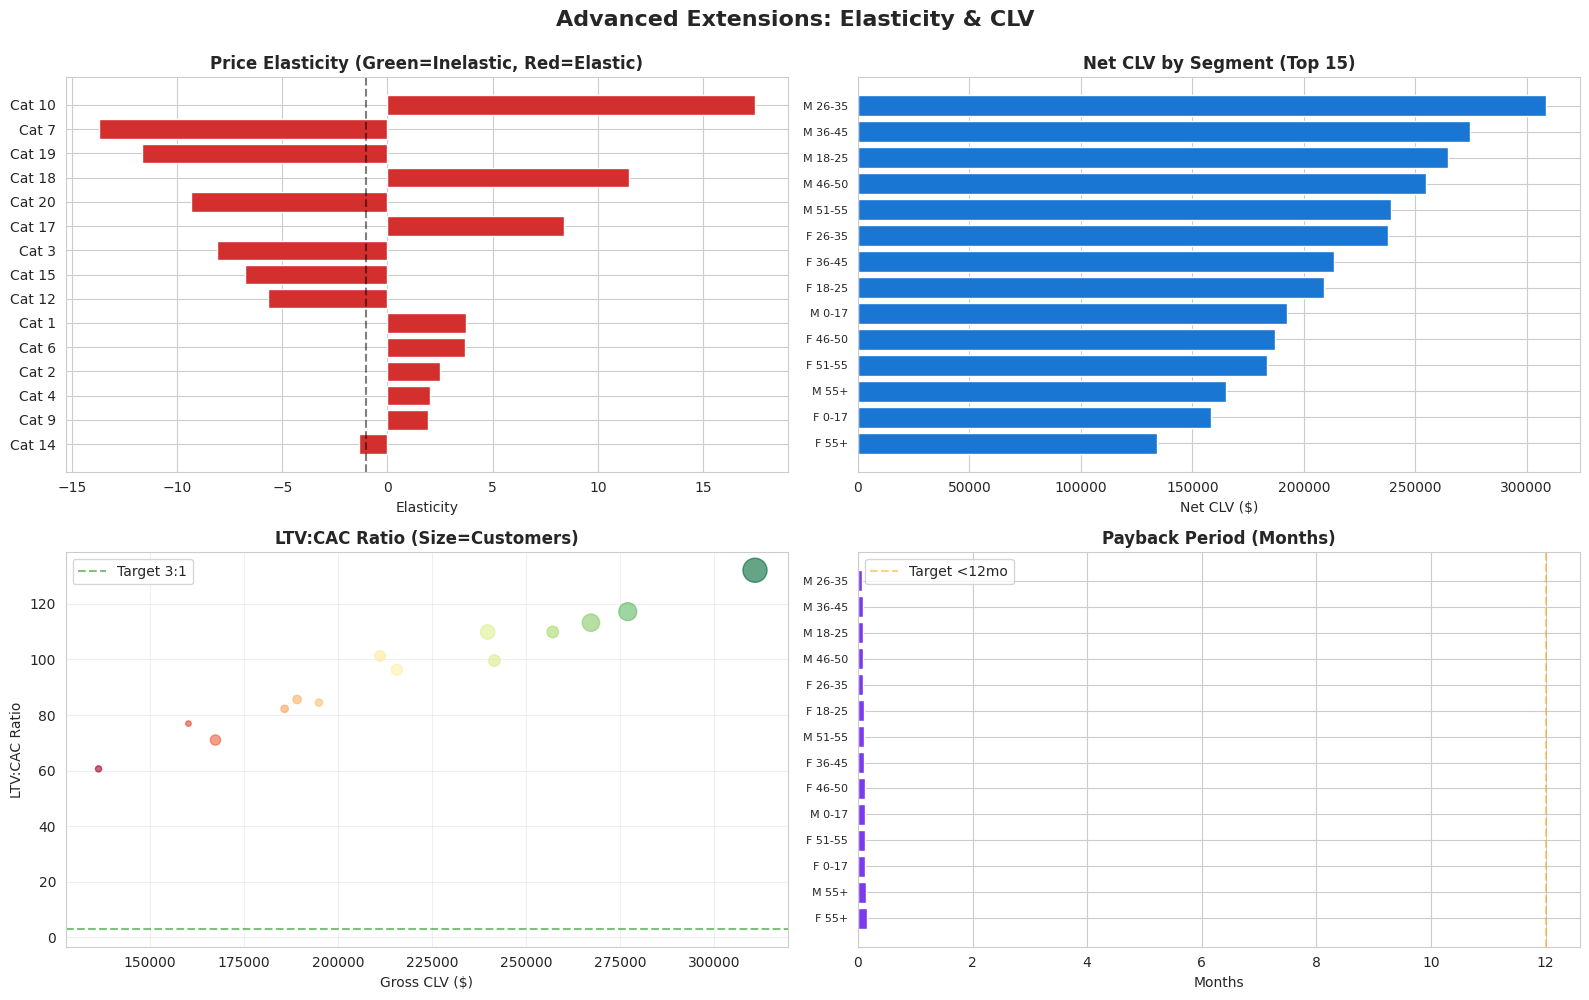

In [67]:
visualize_product_affinity(affinity_df)
visualize_inventory_optimization(inventory_df)
visualize_marketing_roi(roi_df)
visualize_cohort_analysis(cohort_df)
visualize_extensions(elasticity_df, clv_df)